# Experimenting with the `AtomMapper` factory

This notebook illustrates use of the `AtomMapper` factor, which proposes potentially valid atom mappings.
Note that `perses` has specific additional requirements for atom mappings (such as the inability to turn constrained X-H bonds into unconstrained ones) that may further require de-mapping some atoms after this stage.

## Let's take a look at some atom mappings

In [1]:
# First, create some molecules to work with
from openff.toolkit.topology import Molecule
benzene = Molecule.from_smiles('c1ccccc1')
toluene = Molecule.from_smiles('c1ccccc1C')
phenol = Molecule.from_smiles('c1ccccc1O')
catechol = Molecule.from_smiles('c1cccc(O)c1O')
nitrobenzene = Molecule.from_smiles('C1=CC=C(C=C1)[N+](=O)[O-]')
cyclohexane = Molecule.from_smiles('C1CCCCC1')

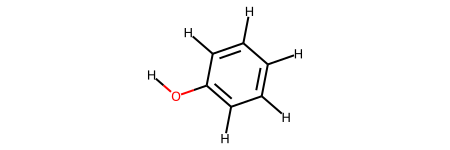

In [2]:
# Remember that OpenFF molecules can be visualized
phenol

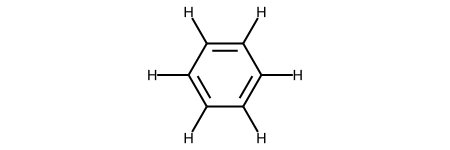

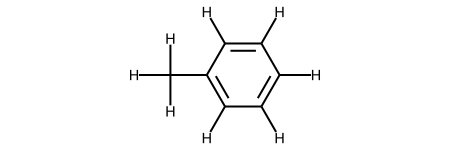

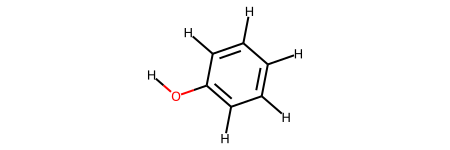

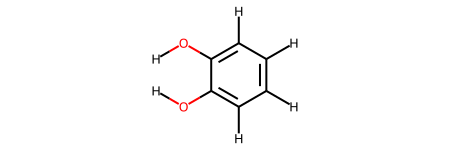

In [3]:
display(benzene, toluene, phenol, catechol)

In [4]:
# Create an AtomMapper factory using the default mapping criteria
from perses.rjmc.atom_mapping import AtomMapper
atom_mapper = AtomMapper()

# Create an atom mapping for the default criteria
atom_mapping = atom_mapper.get_best_mapping(phenol, catechol)

AtomMapping : [H:10][c:3]1[c:2]([c:1]([c:6]([c:5]([c:4]1[H:11])[H:12])[O:7][H:13])[H:8])[H:9] -> [H:10][c:2]1[c:3]([c:4]([c:5]([c:7]([c:1]1[H:9])[O:8][H:14])[O:6][H:13])[H:12])[H:11] : mapped atoms {0: 3, 1: 2, 2: 1, 3: 0, 4: 6, 5: 4, 6: 5, 7: 11, 8: 10, 9: 9, 10: 8, 12: 12}


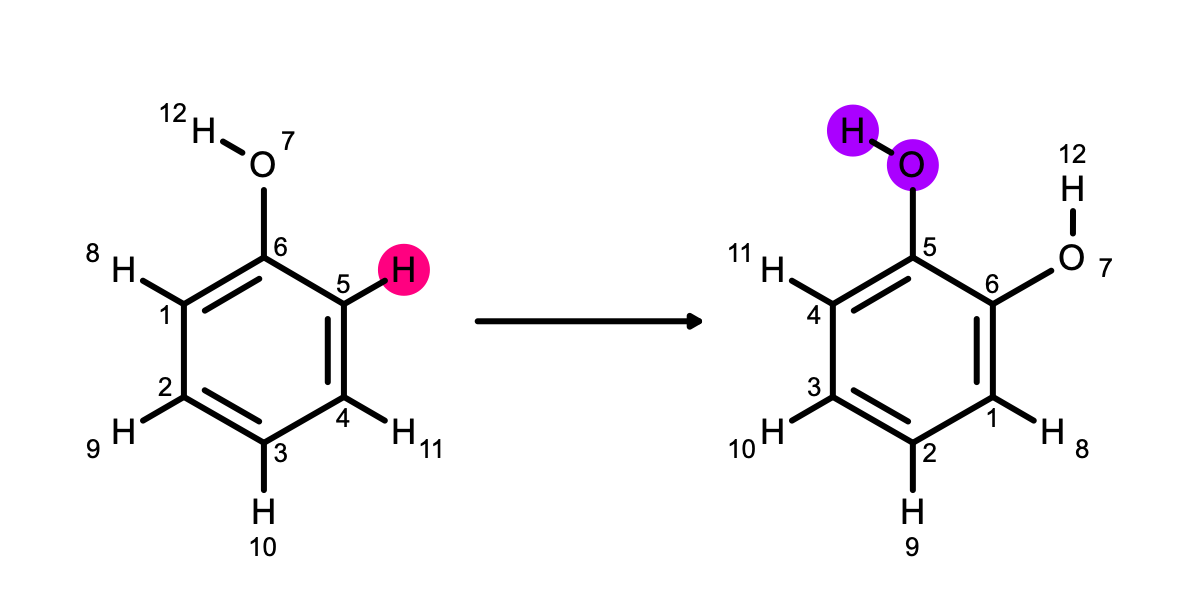

In [5]:
# Visualize the atom mapping
atom_mapping

## Default mapping strengths

The `AtomMapper` class has predefined expressions for [atom and bond equivalence criteria](https://docs.eyesopen.com/toolkits/python/oechemtk/OEChemConstants/OEExprOpts.html#OEChem::OEExprOpts) used in the [OpenEye maximum common substructure facility](https://docs.eyesopen.com/toolkits/python/oechemtk/patternmatch.html):

These include:
* **strong:** A very restrictive, conservative mapping criterion
* **weak:** A minimally restrictive, highly permissive mapping criteria
* **default:** A reasonable compromise between "strong" and "weak" that should be suitable for most purposes
 
Our first examples do not make use of any position or geometry information---just molecular topology.

AtomMapping : [H:10][c:3]1[c:2]([c:1]([c:6]([c:5]([c:4]1[H:11])[H:12])[C:7]([H:13])([H:14])[H:15])[H:8])[H:9] -> [H:10][c:1]1[c:2]([c:3]([c:4]([c:5]([c:6]1[H:14])[H:13])[N+:7](=[O:8])[O-:9])[H:12])[H:11] : mapped atoms {0: 2, 1: 1, 2: 0, 3: 5, 4: 4, 5: 3, 7: 11, 8: 10, 9: 9, 10: 13, 11: 12}


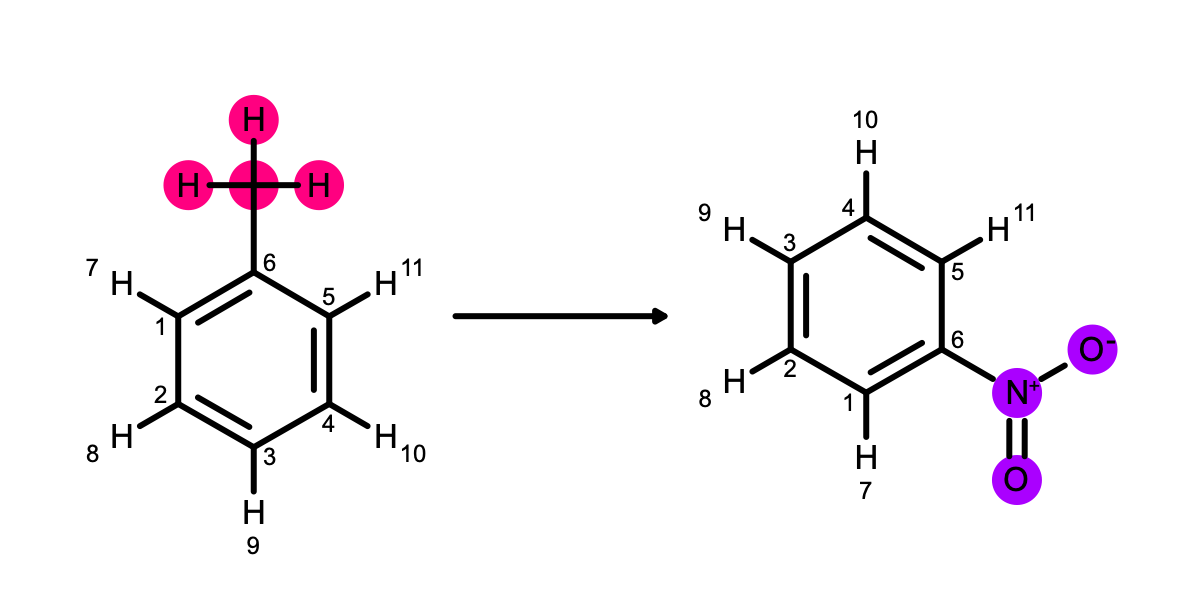

In [6]:
# The most restrictive criteria
atom_mapper = AtomMapper(map_strength='strong')
atom_mapper.get_best_mapping(toluene, nitrobenzene)

AtomMapping : [H:10][c:3]1[c:2]([c:1]([c:6]([c:5]([c:4]1[H:11])[H:12])[C:7]([H:13])([H:14])[H:15])[H:8])[H:9] -> [H:10][c:1]1[c:2]([c:3]([c:4]([c:5]([c:6]1[H:14])[H:13])[N+:7](=[O:8])[O-:9])[H:12])[H:11] : mapped atoms {0: 2, 1: 1, 2: 0, 3: 5, 4: 4, 5: 3, 6: 6, 7: 11, 8: 10, 9: 9, 10: 13, 11: 12}


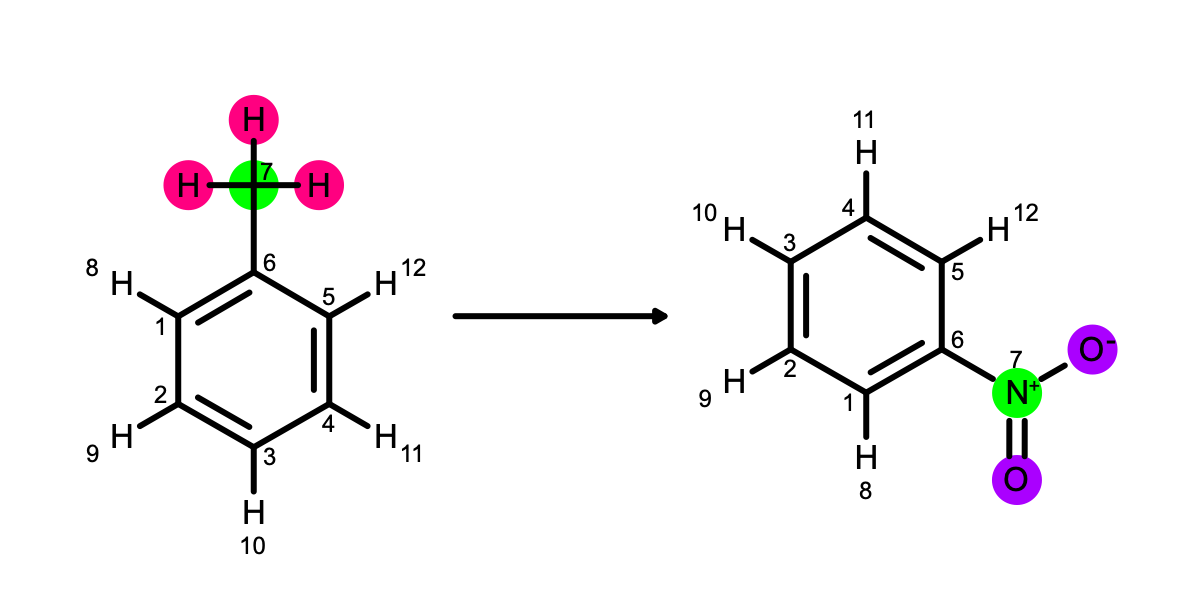

In [7]:
# Default criteria
atom_mapper = AtomMapper(map_strength='default')
atom_mapper.get_best_mapping(toluene, nitrobenzene)

AtomMapping : [H:10][c:3]1[c:2]([c:1]([c:6]([c:5]([c:4]1[H:11])[H:12])[C:7]([H:13])([H:14])[H:15])[H:8])[H:9] -> [H:10][c:1]1[c:2]([c:3]([c:4]([c:5]([c:6]1[H:14])[H:13])[N+:7](=[O:8])[O-:9])[H:12])[H:11] : mapped atoms {0: 2, 1: 1, 2: 0, 3: 5, 4: 4, 5: 3, 6: 6, 7: 11, 8: 10, 9: 9, 10: 13, 11: 12}


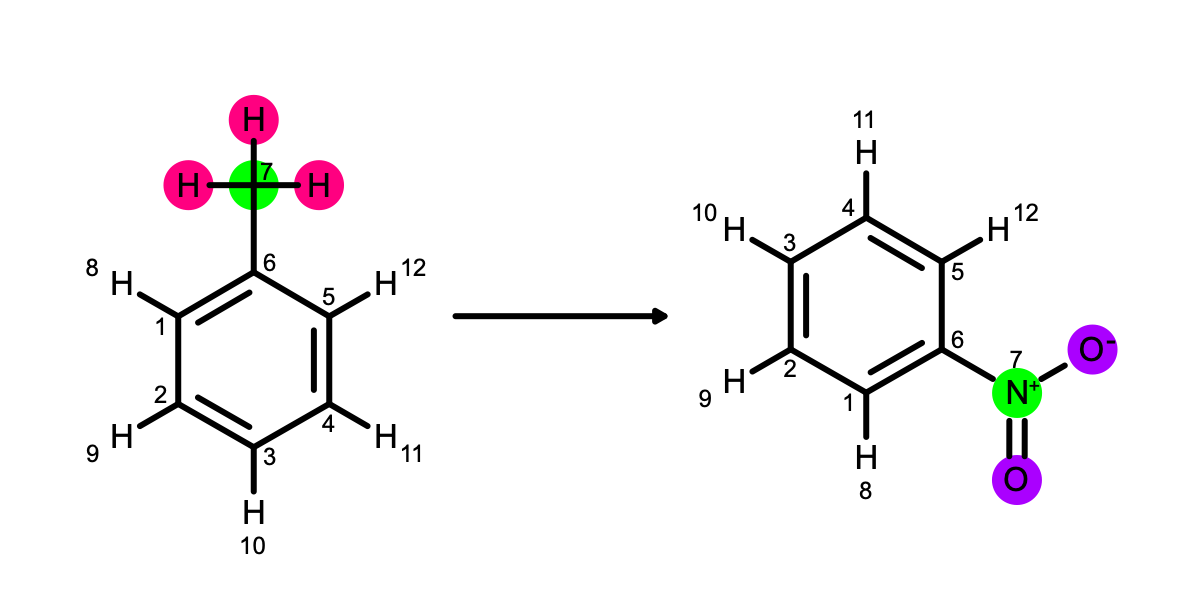

In [8]:
# Permissive criteria
atom_mapper = AtomMapper(map_strength='weak')
atom_mapper.get_best_mapping(toluene, nitrobenzene)

AtomMapping : [H:9][c:3]1[c:2]([c:1]([c:6]([c:5]([c:4]1[H:10])[H:11])[H:12])[H:7])[H:8] -> [H:11][C:3]1([C:2]([C:1]([C:6]([C:5]([C:4]1([H:13])[H:14])([H:15])[H:16])([H:17])[H:18])([H:7])[H:8])([H:9])[H:10])[H:12] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}


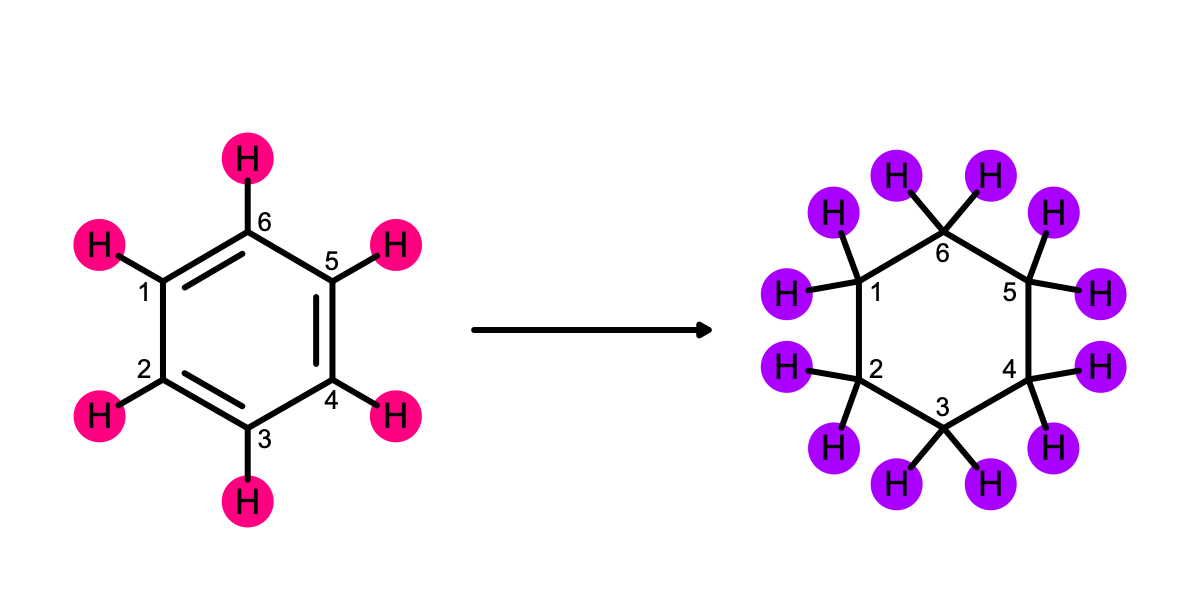

In [9]:
# Permissive criteria allows mappings like benzene -> cyclohexane
atom_mapper = AtomMapper(map_strength='weak')
atom_mapper.get_best_mapping(benzene, cyclohexane)

In [10]:
# The default criteria does not allow mappings like benzene -> cyclohexane
atom_mapper = AtomMapper(map_strength='default')
atom_mapper.get_best_mapping(benzene, cyclohexane)

## Pathological mapping issues

Let's examine some compounds that were previously seen to have [pathological mapping issues in this GitHub issue](https://github.com/choderalab/perses/issues/805):

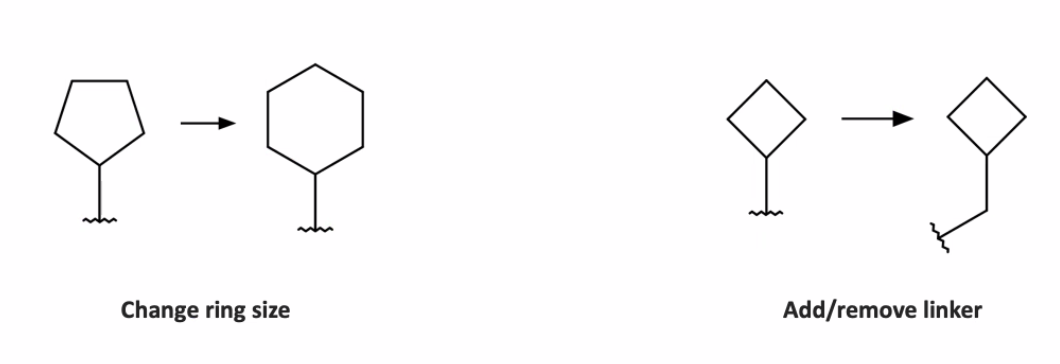

In [11]:
# Create a default atom mapper
atom_mapper = AtomMapper()

AtomMapping : [H:12][C:4]1([C:5]([C:6]([C:2]([C:3]1([H:10])[H:11])([H:9])[N:1]([H:7])[H:8])([H:16])[H:17])([H:14])[H:15])[H:13] -> [H:15][C:5]1([C:4]([C:3]([C:2]([C:7]([C:6]1([H:17])[H:18])([H:19])[H:20])([H:10])[N:1]([H:8])[H:9])([H:11])[H:12])([H:13])[H:14])[H:16] : mapped atoms {0: 0, 6: 7, 7: 8}


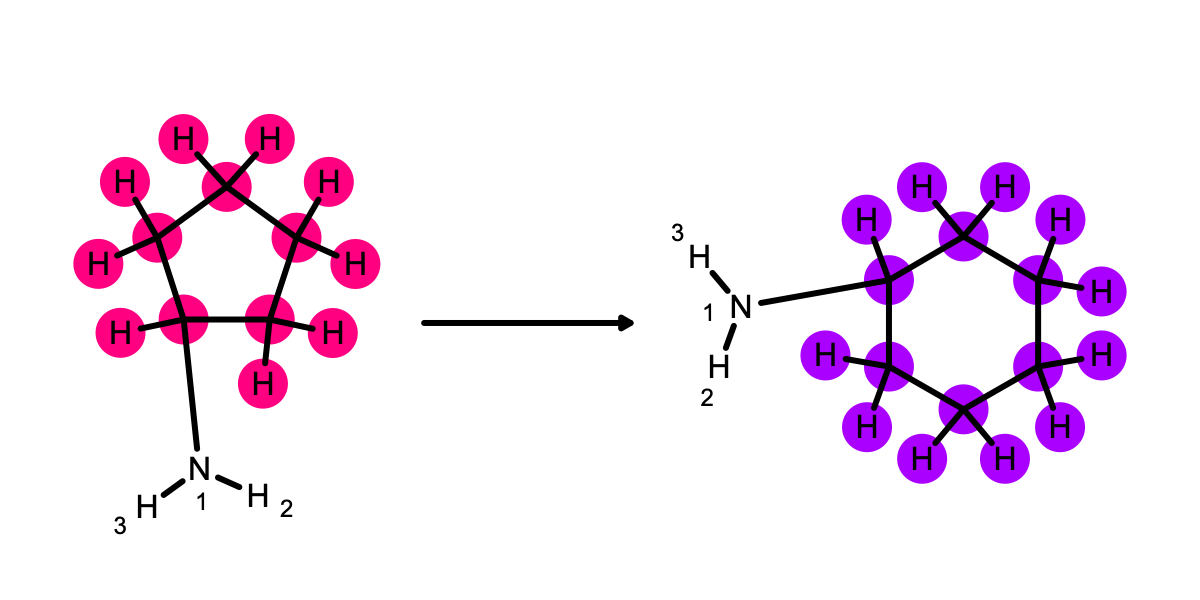

In [12]:
# Check change of ring size
molecule1 = Molecule.from_smiles('NC1CCCC1')
molecule2 = Molecule.from_smiles('NC1CCCCC1')

atom_mapper.get_best_mapping(molecule1, molecule2)

AtomMapping : [H:12][C:4]1([C:5]([C:6]([C:2]([C:3]1([H:10])[H:11])([H:9])[N:1]([H:7])[H:8])([H:16])[H:17])([H:14])[H:15])[H:13] -> [H:15][C:5]1([C:4]([C:3]([C:2]([C:7]([C:6]1([H:17])[H:18])([H:19])[H:20])([H:10])[N:1]([H:8])[H:9])([H:11])[H:12])([H:13])[H:14])[H:16] : mapped atoms {0: 0, 6: 7, 7: 8}


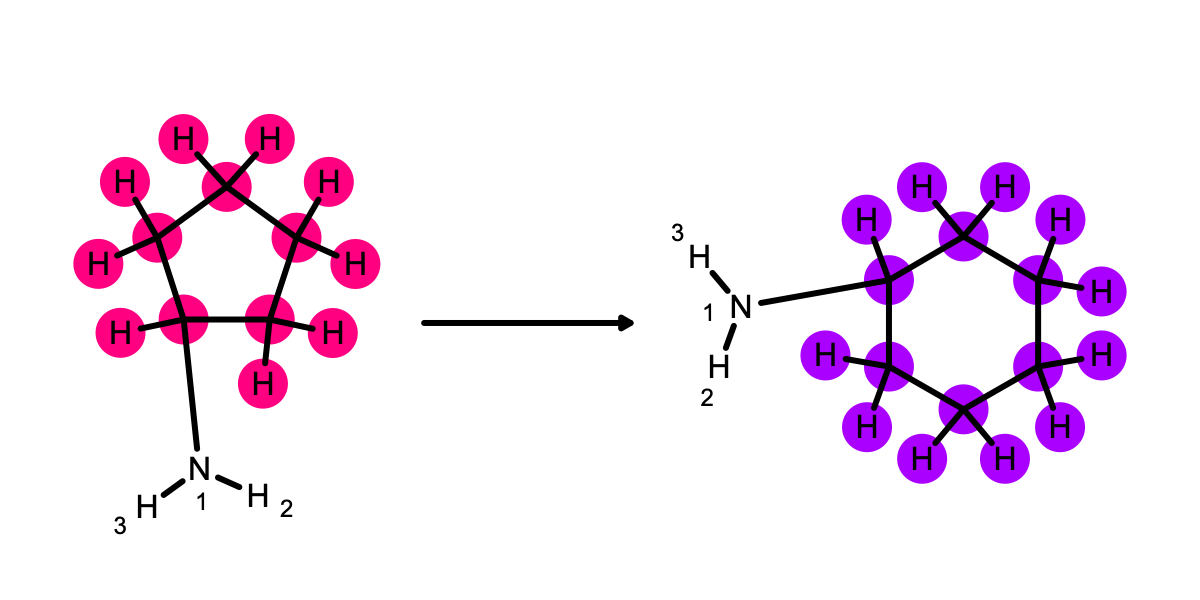

In [13]:
# Make sure it still works even if we have positions defined
molecule1.generate_conformers()
molecule2.generate_conformers()

atom_mapper.get_best_mapping(molecule1, molecule2)

AtomMapping : [H:15][c:3]1[c:2]([c:1]([c:6]([c:5]([c:4]1[H:16])[H:17])[C:7]([H:18])([H:19])[N:8]([H:20])[C:9]2([C:10]([C:11]([C:12]2([H:26])[H:27])([H:24])[H:25])([H:22])[H:23])[H:21])[H:13])[H:14] -> [H:16][c:3]1[c:2]([c:1]([c:6]([c:5]([c:4]1[H:17])[H:18])[C:7]([H:19])([H:20])[N:8]([H:21])[C:9]([H:22])([H:23])[C:10]2([C:11]([C:12]([C:13]2([H:29])[H:30])([H:27])[H:28])([H:25])[H:26])[H:24])[H:14])[H:15] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20}


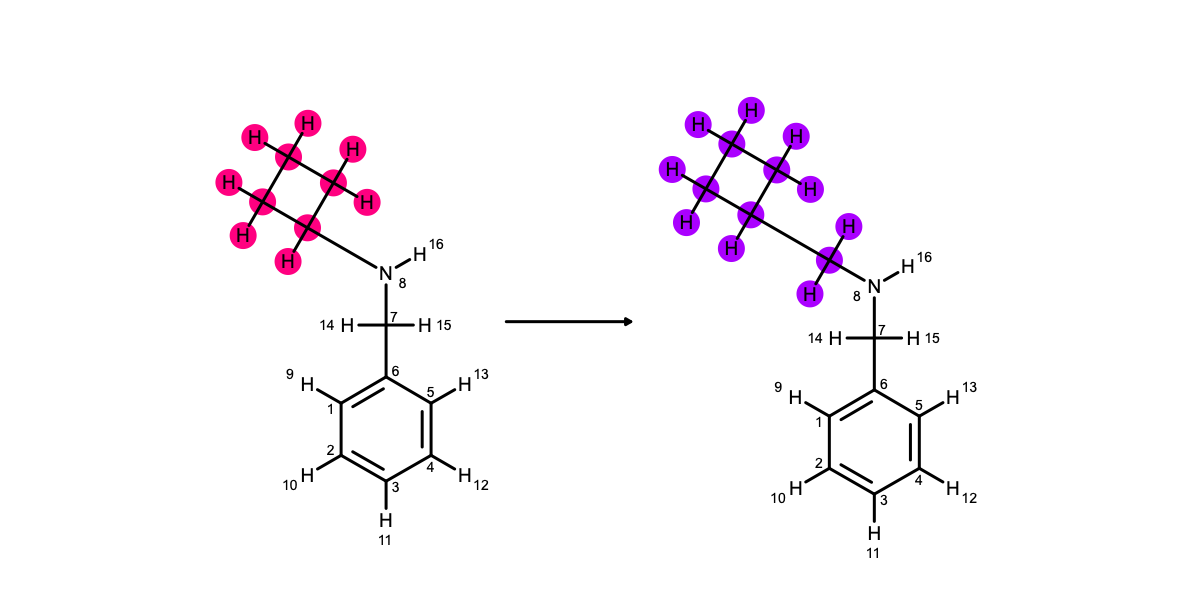

In [14]:
# Check change of linker length
molecule1 = Molecule.from_smiles('c1ccccc1CNC2CCC2')
molecule2 = Molecule.from_smiles('c1ccccc1CNCC2CCC2')

atom_mapper.get_best_mapping(molecule1, molecule2)

## Illustrating atom mappings for the Schrödinger JACS set

Now let's take a look at the Schrödinger JACS set using the default (geometry-informed) mappings.

In [15]:
# Load the Schrödinger datasets
from openff.toolkit.topology import Molecule
from pkg_resources import resource_filename
molecules = dict()
for dataset_name in ['CDK2', 'p38', 'Tyk2', 'Thrombin', 'PTP1B', 'MCL1', 'Jnk1', 'Bace']:
    # Read molecules
    dataset_path = 'data/schrodinger-jacs-datasets/%s_ligands.sdf' % dataset_name
    sdf_filename = resource_filename('perses', dataset_path)
    molecules[dataset_name] = Molecule.from_file(sdf_filename, allow_undefined_stereo=True)

Problematic atoms are:
Atom atomic num: 16, name: , idx: 44, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 10, aromatic: True, chiral: False
bond order: 2, chiral: False to atom atomic num: 8, name: , idx: 45, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 46, aromatic: False, chiral: False



In [16]:
# Select a dataset to play with
dataset = 'Jnk1'

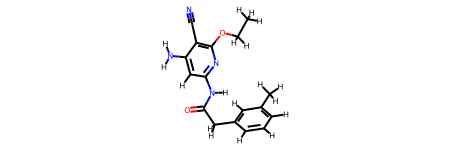

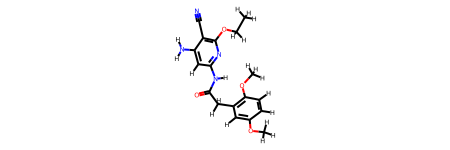

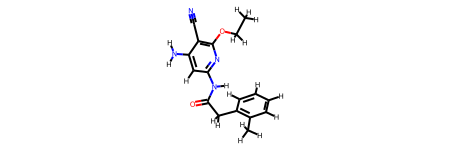

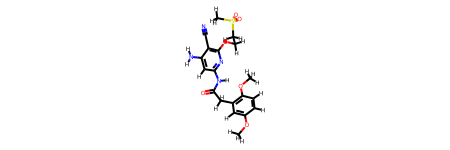

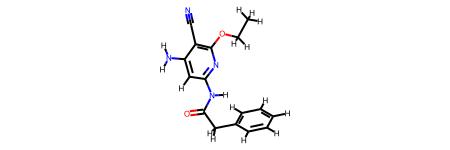

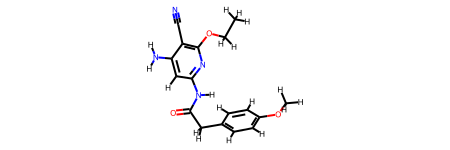

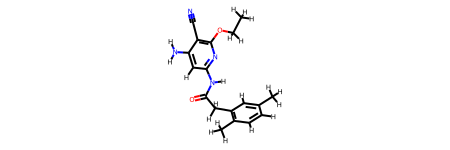

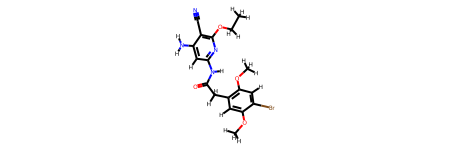

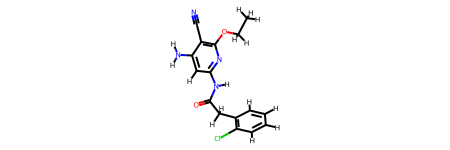

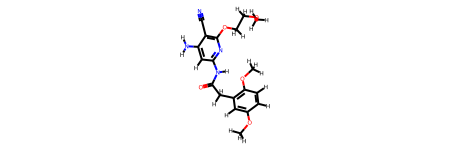

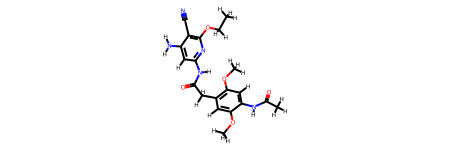

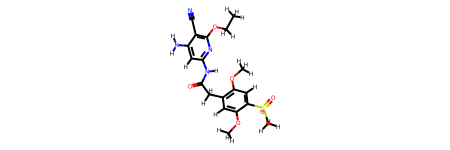

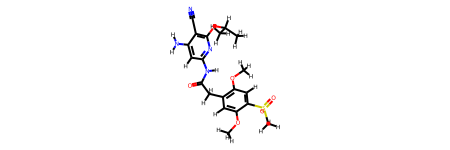

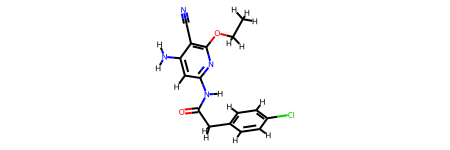

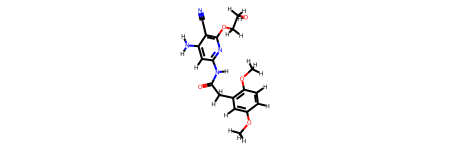

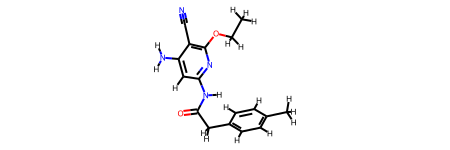

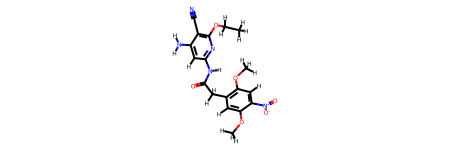

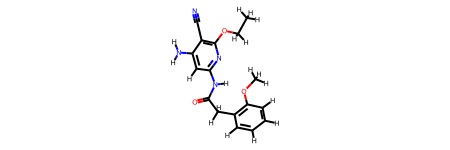

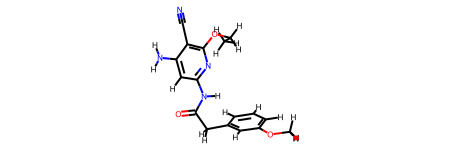

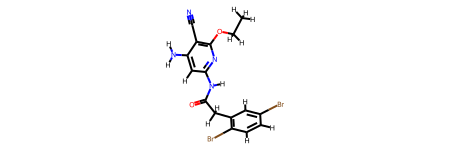

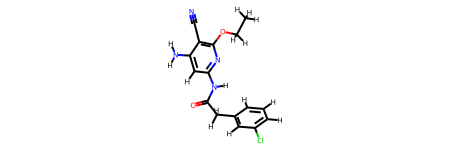

In [17]:
# Let's look at the compounds
for molecule in molecules[dataset]:
    display(molecule.visualize(backend='rdkit'))

In [18]:
# Create a default AtomMapper
from perses.rjmc.atom_mapping import AtomMapper
atom_mapper = AtomMapper()

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 27, 27: 26, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40}


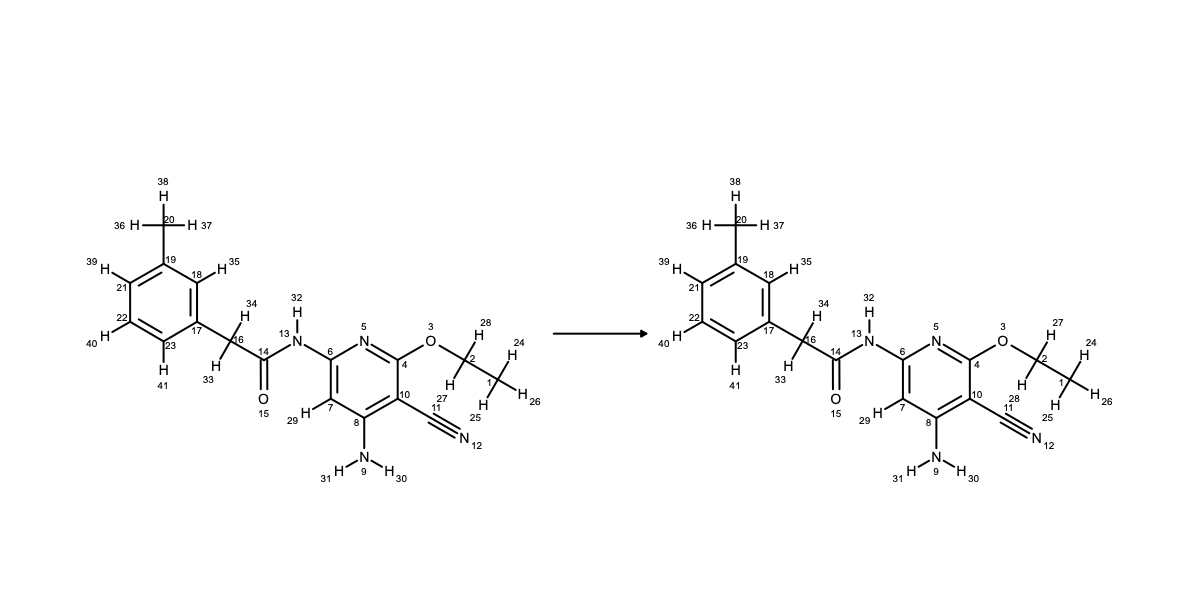

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:42][c:22]1[c:21]([c:18]([c:17]([c:24]([c:23]1[O:25][C:26]([H:44])([H:45])[H:46])[H:43])[C:16]([H:36])([H:37])[C:14](=[O:15])[N:13]([H:35])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:30])([H:31])[C:1]([H:27])([H:28])[H:29])[C:11]#[N:12])[N:9]([H:33])[H:34])[H:32])[O:19][C:20]([H:38])([H:39])[H:40])[H:41] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 23, 18: 22, 19: 24, 20: 21, 21: 20, 22: 17, 23: 28, 24: 27, 25: 26, 26: 30, 27: 29, 28: 31, 29: 32, 30: 33, 31: 34, 32: 35, 33: 36, 34: 42, 38: 41, 39: 40}


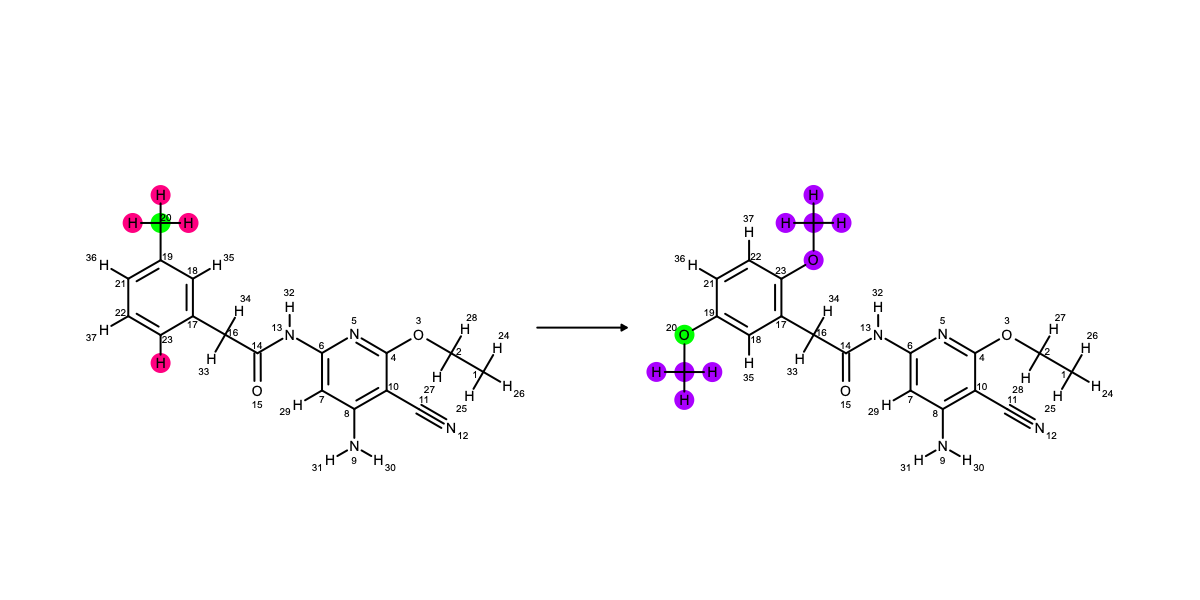

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:39][c:21]1[c:22]([c:23]([c:17]([c:18]([c:20]1[H:38])[C:19]([H:35])([H:36])[H:37])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:41])[H:40] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 22, 18: 21, 20: 20, 21: 19, 22: 17, 23: 23, 24: 24, 25: 25, 26: 27, 27: 26, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 40, 38: 38, 39: 37}


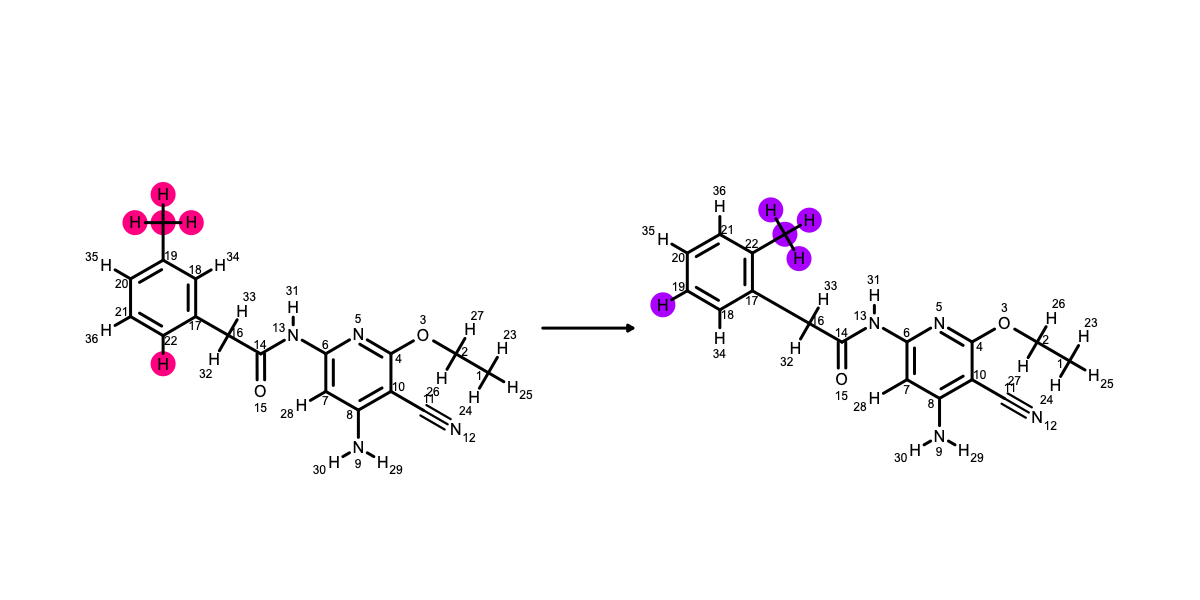

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:48][c:26]1[c:25]([c:22]([c:21]([c:28]([c:27]1[O:29][C:30]([H:50])([H:51])[H:52])[H:49])[C:20]([H:42])([H:43])[C:18](=[O:19])[N:17]([H:41])[c:10]2[c:11]([c:12]([c:14]([c:8]([n:9]2)[O:7][C:6]([H:36])([H:37])[C:5]([H:34])([H:35])[S:2](=[O:3])(=[O:4])[C:1]([H:31])([H:32])[H:33])[C:15]#[N:16])[N:13]([H:39])[H:40])[H:38])[O:23][C:24]([H:44])([H:45])[H:46])[H:47] : mapped atoms {0: 4, 1: 5, 2: 6, 3: 7, 4: 8, 5: 9, 6: 10, 7: 11, 8: 12, 9: 13, 10: 14, 11: 15, 12: 16, 13: 17, 14: 18, 15: 19, 16: 20, 17: 27, 18: 26, 19: 28, 20: 25, 21: 24, 22: 21, 24: 33, 25: 34, 26: 36, 27: 35, 28: 37, 29: 38, 30: 39, 31: 40, 32: 41, 33: 42, 34: 48, 38: 47, 39: 46}


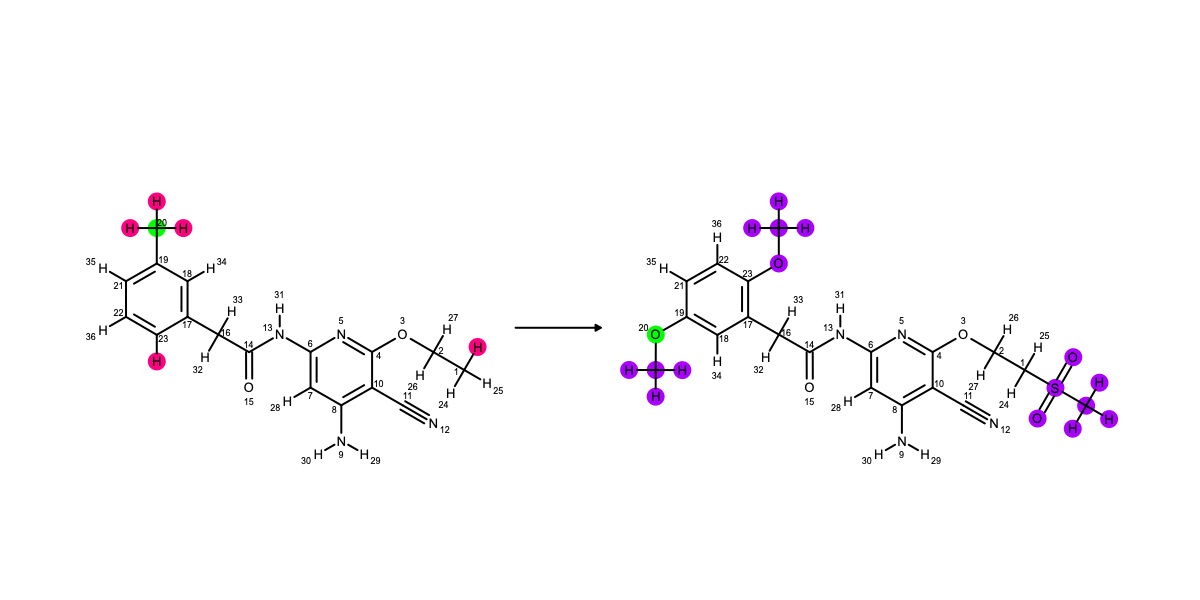

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:36][c:20]1[c:19]([c:18]([c:17]([c:22]([c:21]1[H:37])[H:38])[C:16]([H:32])([H:33])[C:14](=[O:15])[N:13]([H:31])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:26])([H:27])[C:1]([H:23])([H:24])[H:25])[C:11]#[N:12])[N:9]([H:29])[H:30])[H:28])[H:34])[H:35] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 21, 18: 20, 20: 19, 21: 18, 22: 17, 23: 22, 24: 23, 25: 24, 26: 26, 27: 25, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 37, 38: 35, 39: 34, 40: 33}


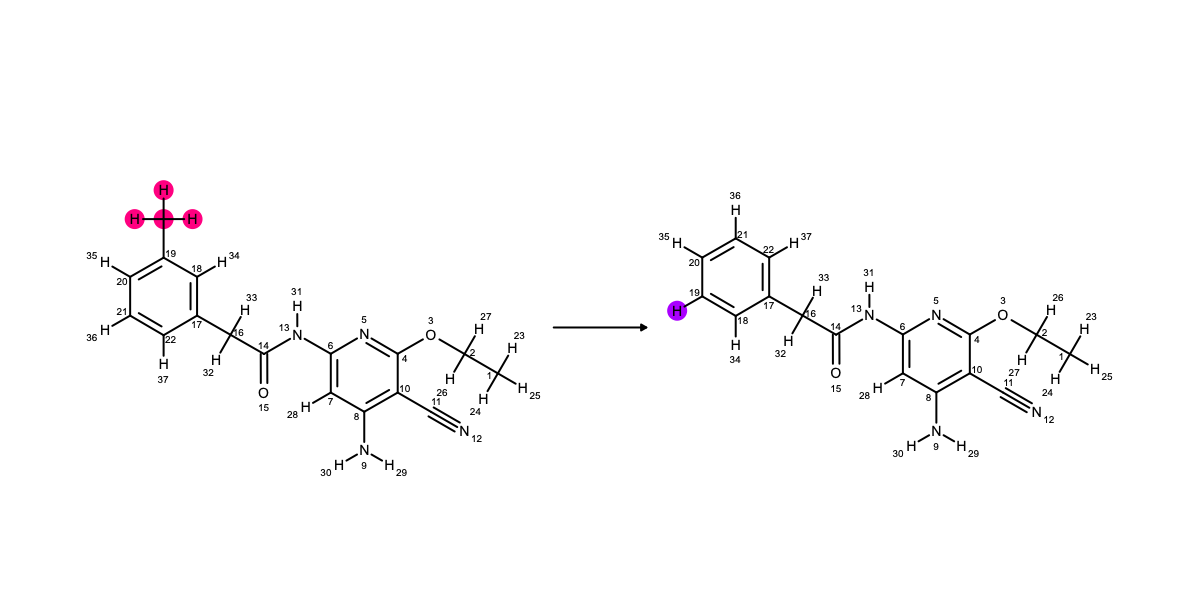

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:36][c:18]1[c:19]([c:20]([c:21]([c:22]([c:17]1[C:16]([H:34])([H:35])[C:14](=[O:15])[N:13]([H:33])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:28])([H:29])[C:1]([H:25])([H:26])[H:27])[C:11]#[N:12])[N:9]([H:31])[H:32])[H:30])[H:39])[H:38])[O:23][C:24]([H:40])([H:41])[H:42])[H:37] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 21, 18: 20, 20: 19, 21: 18, 22: 17, 23: 24, 24: 25, 25: 26, 26: 28, 27: 27, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 38, 39: 36, 40: 35}


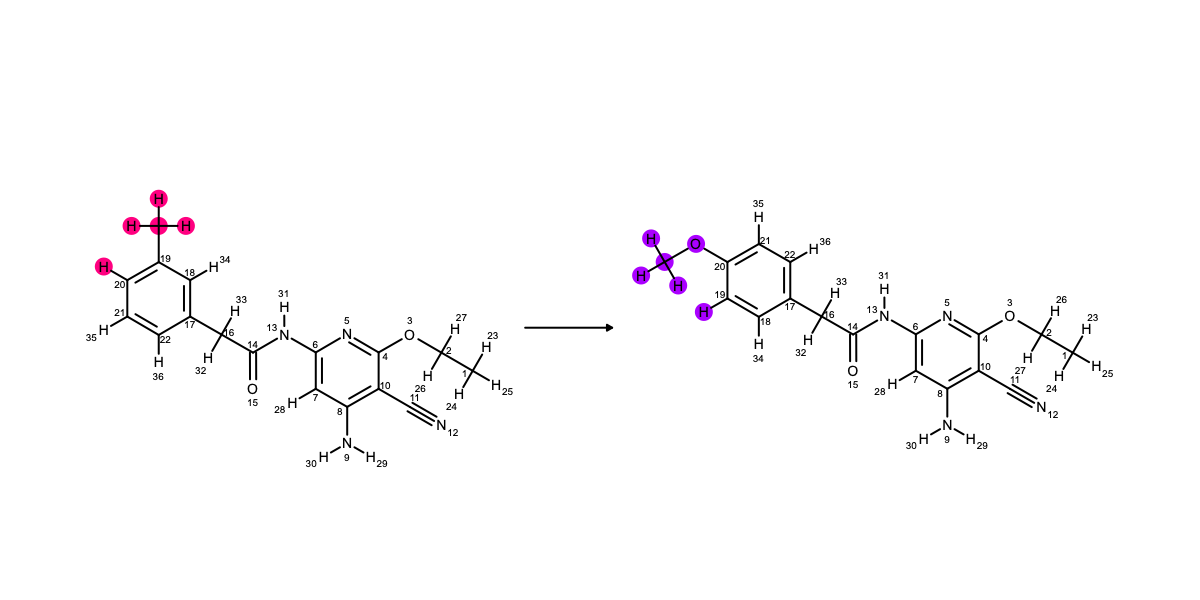

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:40][c:21]1[c:20]([c:18]([c:17]([c:24]([c:22]1[C:23]([H:41])([H:42])[H:43])[H:44])[C:16]([H:34])([H:35])[C:14](=[O:15])[N:13]([H:33])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:28])([H:29])[C:1]([H:25])([H:26])[H:27])[C:11]#[N:12])[N:9]([H:31])[H:32])[H:30])[C:19]([H:36])([H:37])[H:38])[H:39] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 23, 18: 21, 19: 22, 20: 20, 21: 19, 22: 17, 23: 24, 24: 25, 25: 26, 26: 28, 27: 27, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 43, 35: 40, 36: 41, 37: 42, 38: 39, 39: 38}


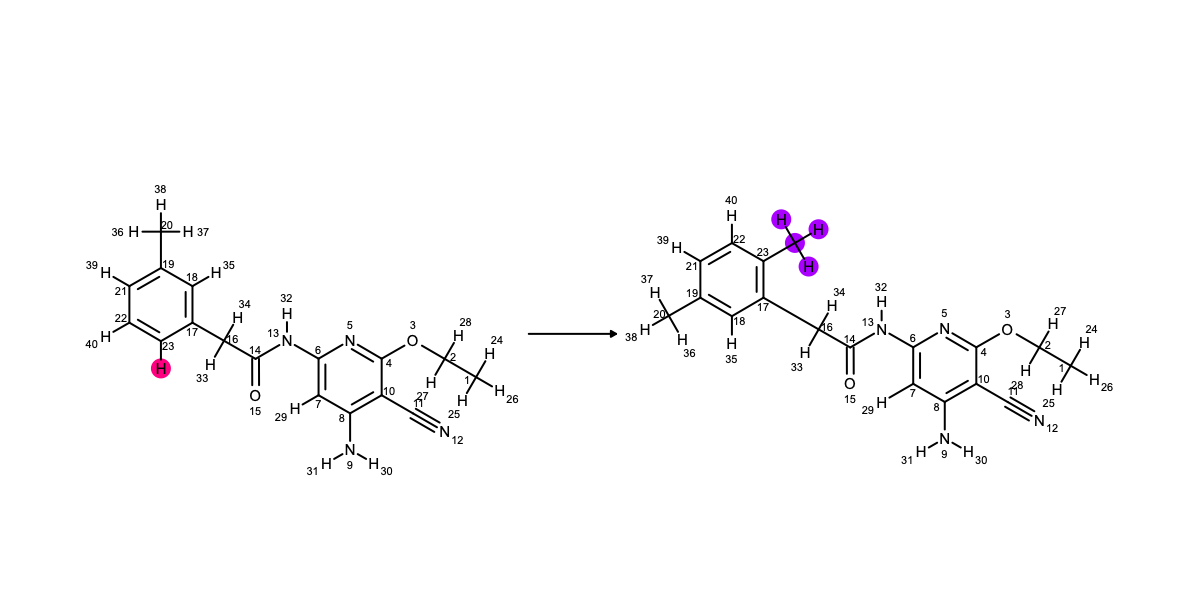

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:43][c:25]1[c:17]([c:18]([c:21]([c:22]([c:24]1[O:26][C:27]([H:44])([H:45])[H:46])[Br:23])[H:42])[O:19][C:20]([H:39])([H:40])[H:41])[C:16]([H:37])([H:38])[C:14](=[O:15])[N:13]([H:36])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:31])([H:32])[C:1]([H:28])([H:29])[H:30])[C:11]#[N:12])[N:9]([H:34])[H:35])[H:33] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 24, 18: 23, 19: 25, 20: 21, 21: 20, 22: 17, 23: 27, 24: 28, 25: 29, 26: 31, 27: 30, 28: 32, 29: 33, 30: 34, 31: 35, 32: 36, 33: 37, 34: 42, 39: 41}


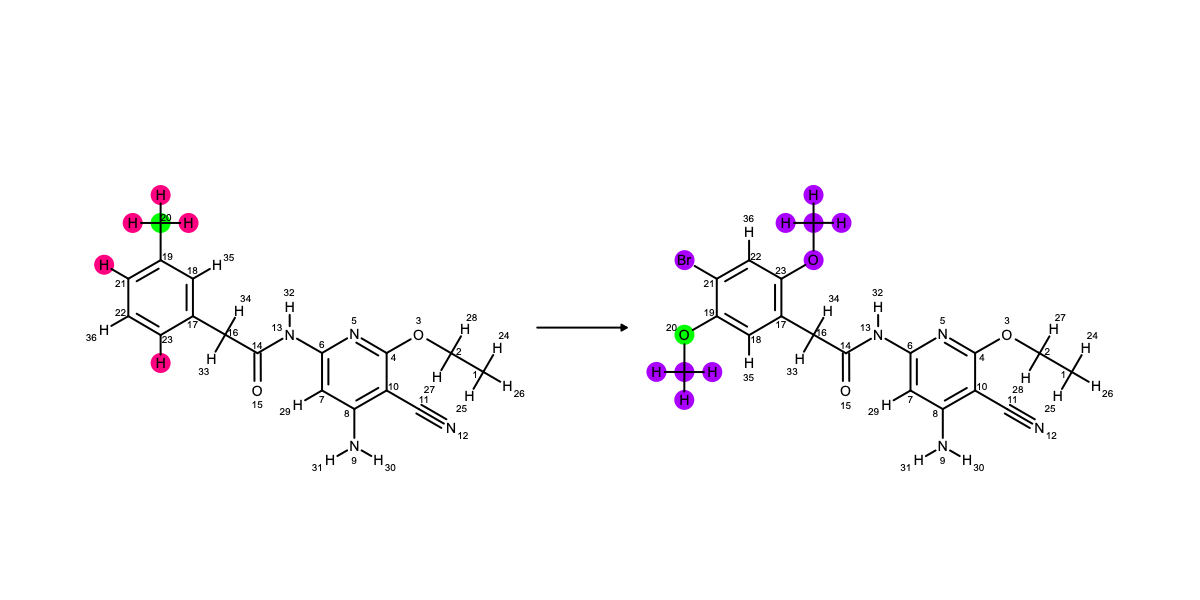

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:37][c:22]1[c:21]([c:20]([c:18]([c:17]([c:23]1[H:38])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[Cl:19])[H:35])[H:36] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 22, 18: 21, 20: 20, 21: 19, 22: 17, 23: 23, 24: 24, 25: 25, 26: 27, 27: 26, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 37, 38: 35, 39: 34}


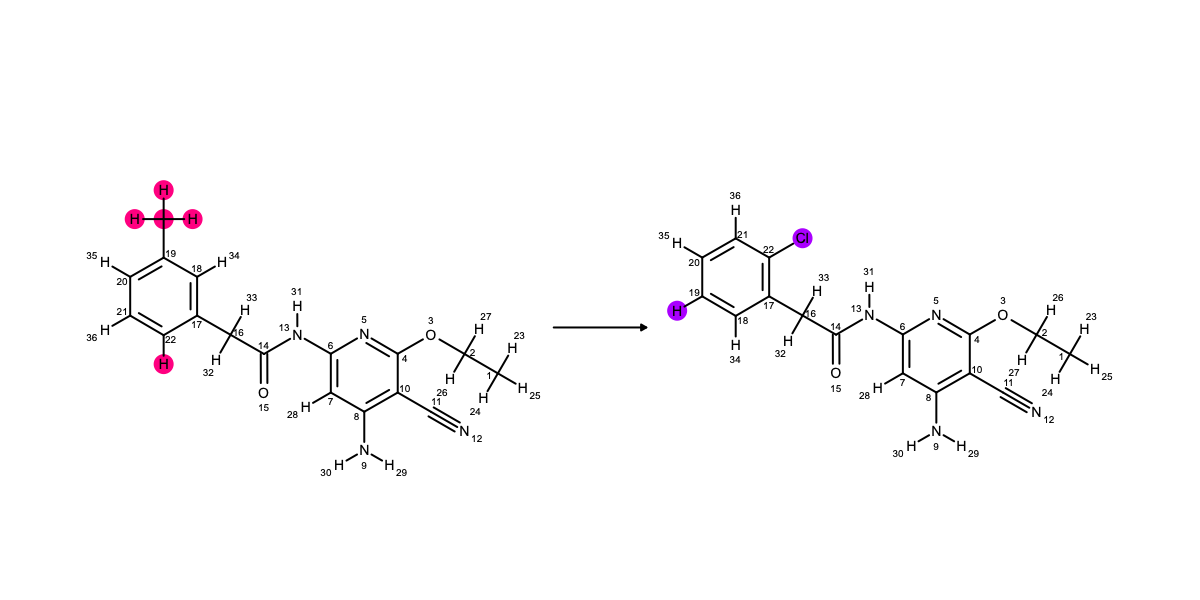

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:46][c:24]1[c:23]([c:20]([c:19]([c:26]([c:25]1[O:27][C:28]([H:48])([H:49])[H:50])[H:47])[C:18]([H:40])([H:41])[C:16](=[O:17])[N:15]([H:39])[c:8]2[c:9]([c:10]([c:12]([c:6]([n:7]2)[O:5][C:4]([H:34])([H:35])[C:3]([H:32])([H:33])[O:2][C:1]([H:29])([H:30])[H:31])[C:13]#[N:14])[N:11]([H:37])[H:38])[H:36])[O:21][C:22]([H:42])([H:43])[H:44])[H:45] : mapped atoms {0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10, 9: 11, 10: 12, 11: 13, 12: 14, 13: 15, 14: 16, 15: 17, 16: 18, 17: 25, 18: 24, 19: 26, 20: 23, 21: 22, 22: 19, 24: 31, 25: 32, 26: 34, 27: 33, 28: 35, 29: 36, 30: 37, 31: 38, 32: 39, 33: 40, 34: 46, 38: 45, 39: 44}


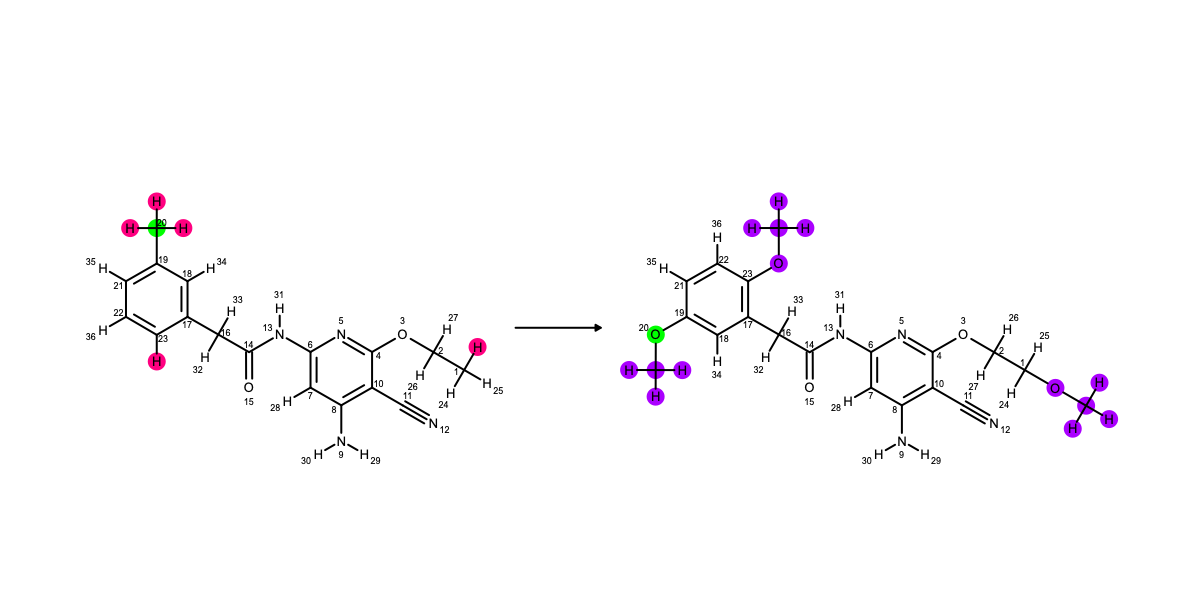

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:46][c:24]1[c:17]([c:18]([c:21]([c:22]([c:23]1[O:25][C:26]([H:47])([H:48])[H:49])[N:27]([H:50])[C:28](=[O:29])[C:30]([H:51])([H:52])[H:53])[H:45])[O:19][C:20]([H:42])([H:43])[H:44])[C:16]([H:40])([H:41])[C:14](=[O:15])[N:13]([H:39])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:34])([H:35])[C:1]([H:31])([H:32])[H:33])[C:11]#[N:12])[N:9]([H:37])[H:38])[H:36] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 23, 18: 22, 19: 24, 20: 21, 21: 20, 22: 17, 23: 30, 24: 31, 25: 32, 26: 33, 27: 34, 28: 35, 29: 37, 30: 36, 31: 38, 32: 39, 33: 40, 34: 45, 39: 44}


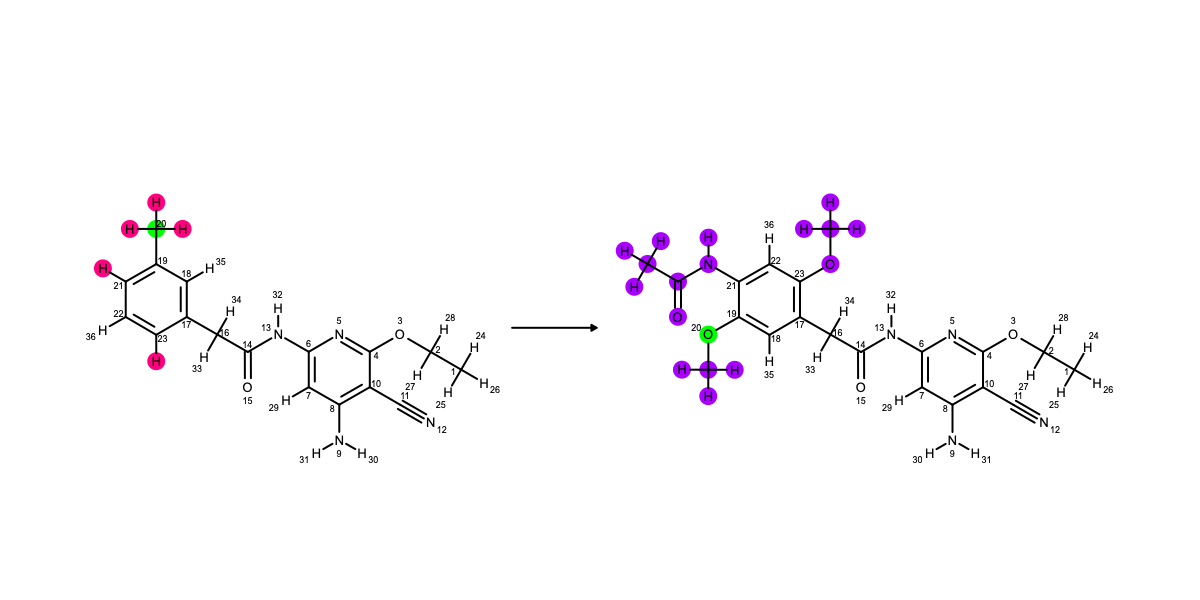

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:49][c:28]1[c:17]([c:18]([c:21]([c:22]([c:27]1[O:29][C:30]([H:50])([H:51])[H:52])[S:23](=[O:24])(=[O:25])[C:26]([H:46])([H:47])[H:48])[H:45])[O:19][C:20]([H:42])([H:43])[H:44])[C:16]([H:40])([H:41])[C:14](=[O:15])[N:13]([H:39])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:34])([H:35])[C:1]([H:31])([H:32])[H:33])[C:11]#[N:12])[N:9]([H:37])[H:38])[H:36] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 27, 18: 26, 19: 28, 20: 21, 21: 20, 22: 17, 23: 32, 24: 31, 25: 30, 26: 34, 27: 33, 28: 35, 29: 36, 30: 37, 31: 38, 32: 39, 33: 40, 34: 48, 39: 44}


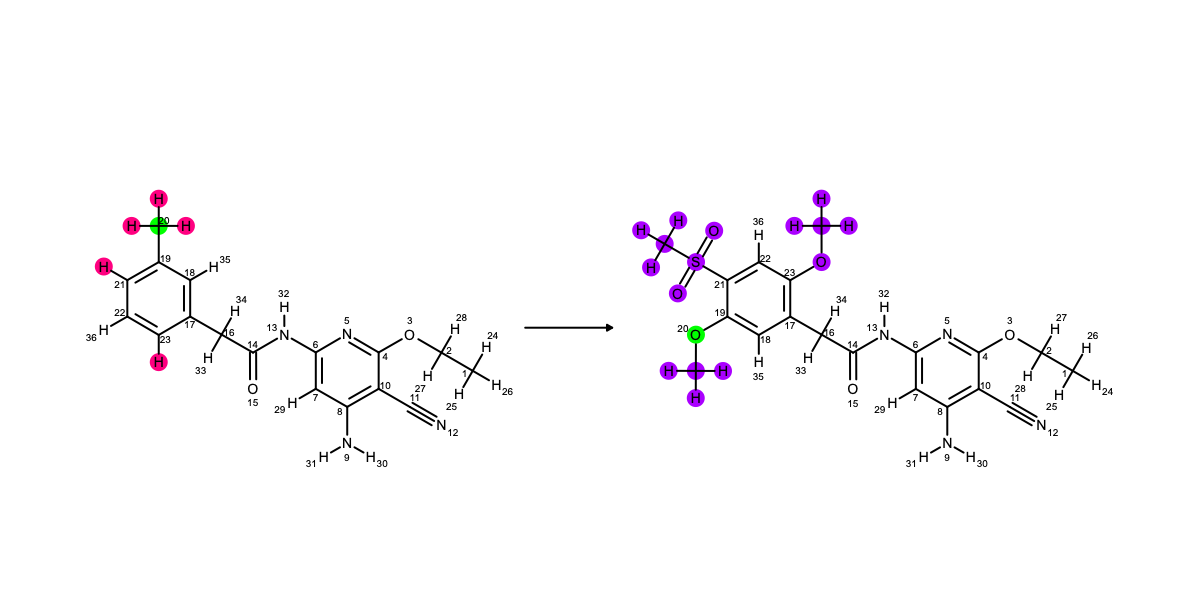

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:52][c:29]1[c:18]([c:19]([c:22]([c:23]([c:28]1[O:30][C:31]([H:53])([H:54])[H:55])[S:24](=[O:25])(=[O:26])[C:27]([H:49])([H:50])[H:51])[H:48])[O:20][C:21]([H:45])([H:46])[H:47])[C:17]([H:43])([H:44])[C:15](=[O:16])[N:14]([H:42])[c:7]2[c:8]([c:9]([c:11]([c:5]([n:6]2)[O:4][C:2]([H:35])([C:1]([H:32])([H:33])[H:34])[C:3]([H:36])([H:37])[H:38])[C:12]#[N:13])[N:10]([H:40])[H:41])[H:39] : mapped atoms {0: 0, 1: 1, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 28, 18: 27, 19: 29, 20: 22, 21: 21, 22: 18, 23: 33, 24: 32, 25: 31, 26: 34, 28: 38, 29: 39, 30: 40, 31: 41, 32: 42, 33: 43, 34: 51, 39: 47}


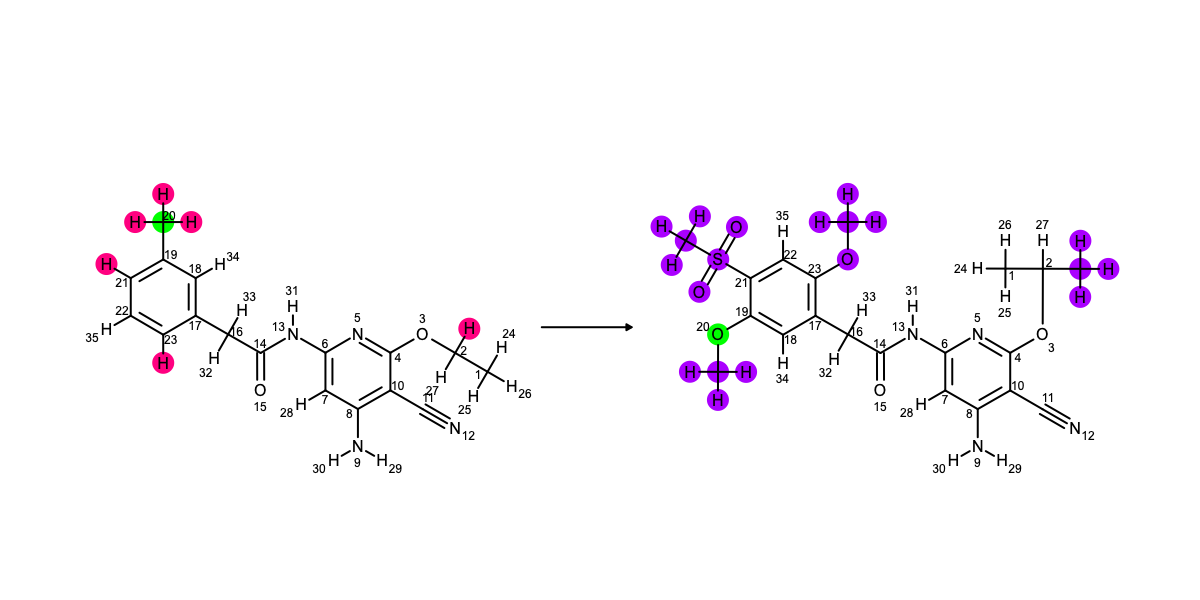

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:35][c:18]1[c:19]([c:20]([c:22]([c:23]([c:17]1[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:38])[H:37])[Cl:21])[H:36] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 22, 18: 21, 20: 19, 21: 18, 22: 17, 23: 23, 24: 24, 25: 25, 26: 27, 27: 26, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 37, 39: 35, 40: 34}


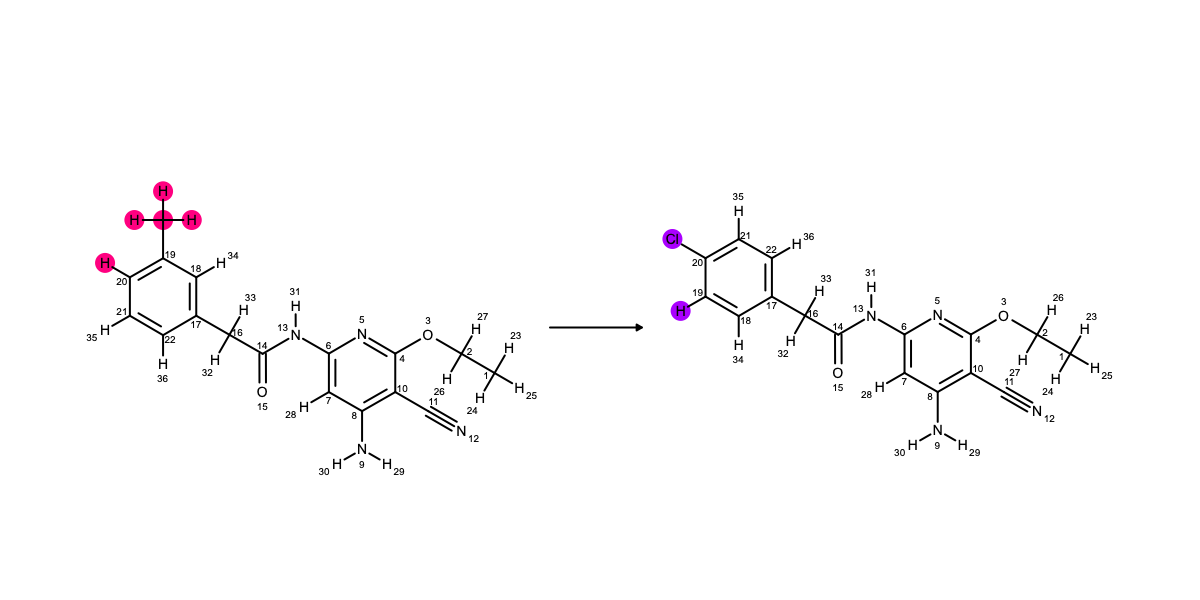

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:43][c:23]1[c:22]([c:19]([c:18]([c:25]([c:24]1[O:26][C:27]([H:45])([H:46])[H:47])[H:44])[C:17]([H:37])([H:38])[C:15](=[O:16])[N:14]([H:36])[c:7]2[c:8]([c:9]([c:11]([c:5]([n:6]2)[O:4][C:3]([H:31])([H:32])[C:2]([H:29])([H:30])[O:1][H:28])[C:12]#[N:13])[N:10]([H:34])[H:35])[H:33])[O:20][C:21]([H:39])([H:40])[H:41])[H:42] : mapped atoms {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 24, 18: 23, 19: 25, 20: 22, 21: 21, 22: 18, 24: 28, 25: 29, 26: 30, 27: 31, 28: 32, 29: 34, 30: 33, 31: 35, 32: 36, 33: 37, 34: 43, 38: 42, 39: 41}


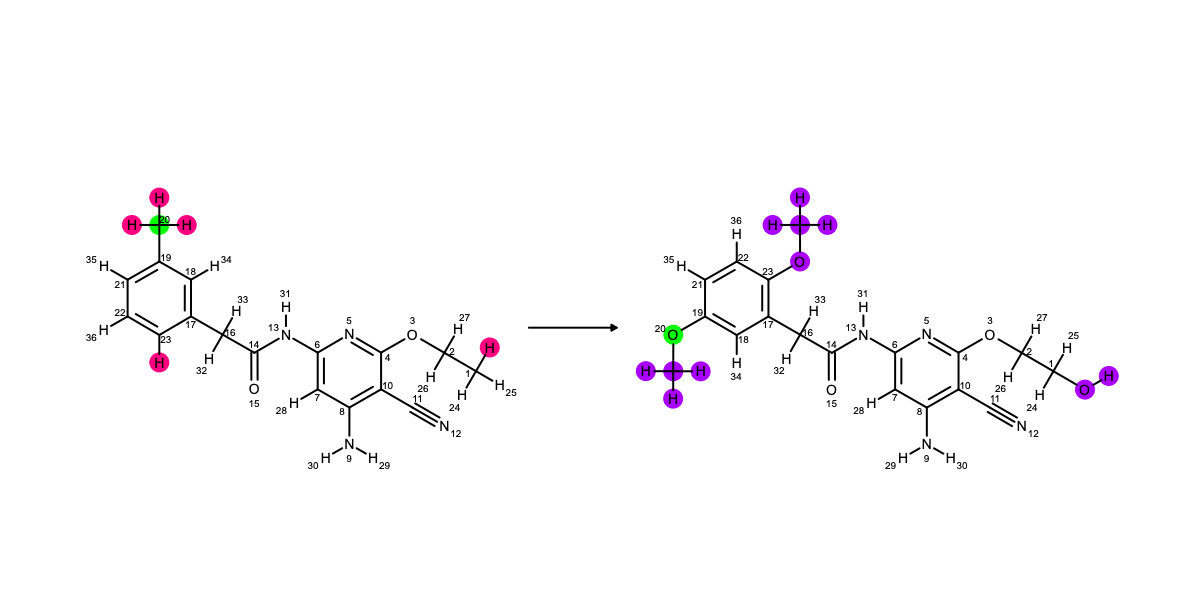

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:36][c:19]1[c:18]([c:17]([c:23]([c:22]([c:20]1[C:21]([H:37])([H:38])[H:39])[H:40])[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 22, 18: 21, 20: 19, 21: 18, 22: 17, 23: 23, 24: 24, 25: 25, 26: 27, 27: 26, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 40, 39: 35, 40: 34}


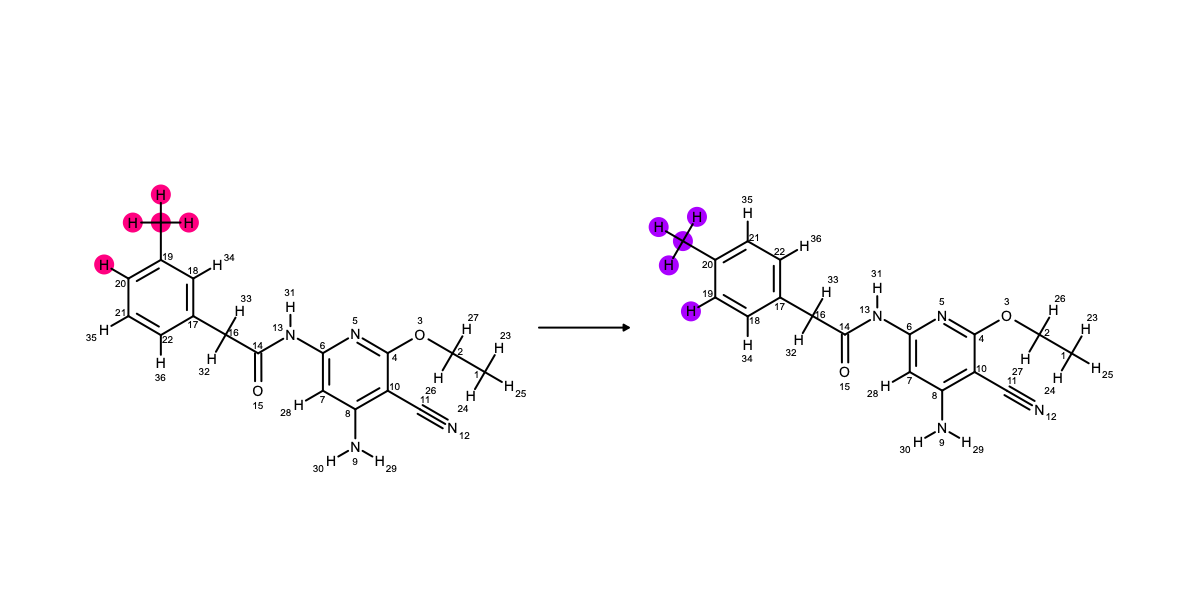

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:45][c:27]1[c:17]([c:18]([c:21]([c:22]([c:26]1[O:28][C:29]([H:46])([H:47])[H:48])[N+:23](=[O:25])[O-:24])[H:44])[O:19][C:20]([H:41])([H:42])[H:43])[C:16]([H:39])([H:40])[C:14](=[O:15])[N:13]([H:38])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:33])([H:34])[C:1]([H:30])([H:31])[H:32])[C:11]#[N:12])[N:9]([H:36])[H:37])[H:35] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 26, 18: 25, 19: 27, 20: 21, 21: 20, 22: 17, 23: 31, 24: 30, 25: 29, 26: 33, 27: 32, 28: 34, 29: 35, 30: 36, 31: 37, 32: 38, 33: 39, 34: 44, 39: 43}


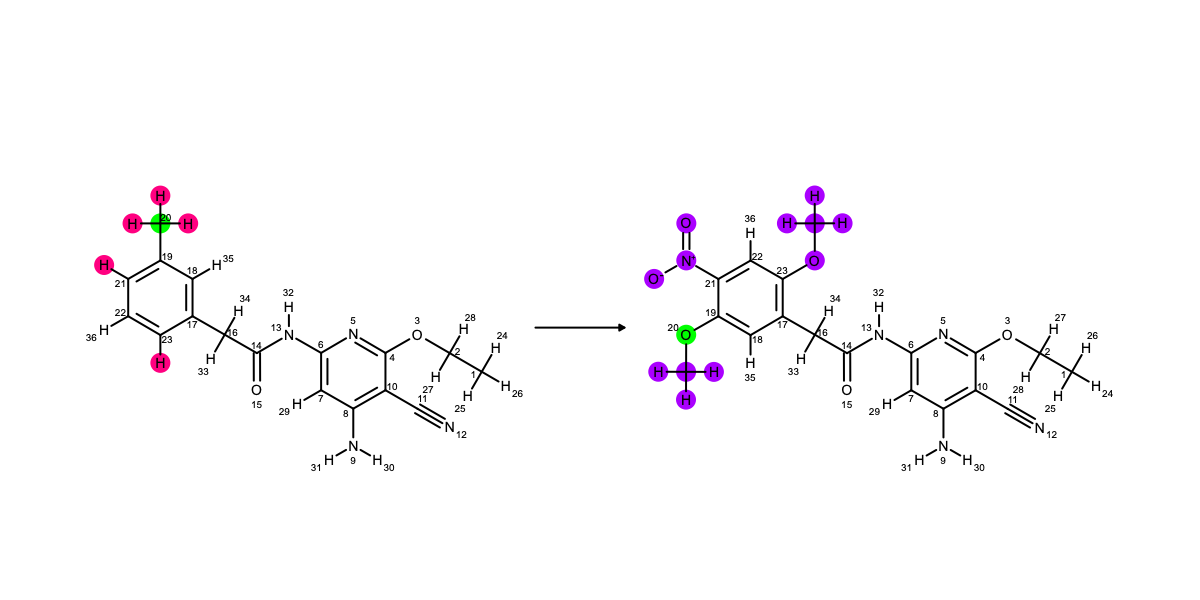

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:41][c:23]1[c:22]([c:21]([c:18]([c:17]([c:24]1[H:42])[C:16]([H:34])([H:35])[C:14](=[O:15])[N:13]([H:33])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:28])([H:29])[C:1]([H:25])([H:26])[H:27])[C:11]#[N:12])[N:9]([H:31])[H:32])[H:30])[O:19][C:20]([H:36])([H:37])[H:38])[H:39])[H:40] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 23, 18: 22, 20: 21, 21: 20, 22: 17, 23: 24, 24: 25, 25: 26, 26: 28, 27: 27, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 41, 38: 39, 39: 38}


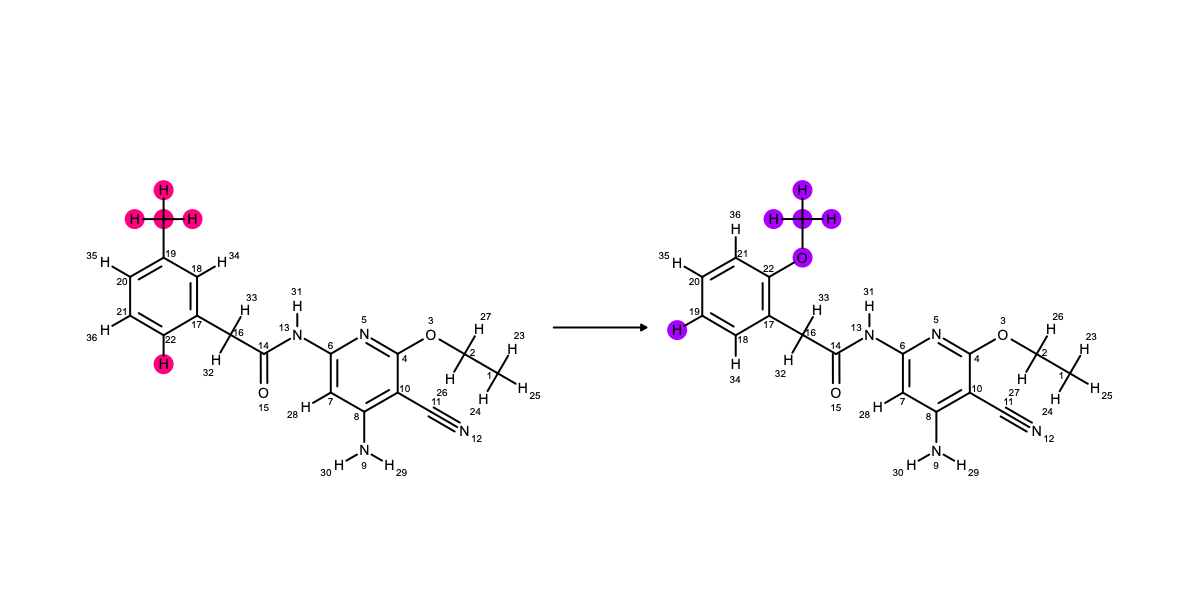

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:41][c:23]1[c:24]([c:17]([c:18]([c:19]([c:22]1[H:40])[O:20][C:21]([H:37])([H:38])[H:39])[H:36])[C:16]([H:34])([H:35])[C:14](=[O:15])[N:13]([H:33])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:28])([H:29])[C:1]([H:25])([H:26])[H:27])[C:11]#[N:12])[N:9]([H:31])[H:32])[H:30])[H:42] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 21, 21: 22, 22: 23, 23: 26, 24: 25, 25: 24, 26: 28, 27: 27, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 38: 39, 39: 40, 40: 41}


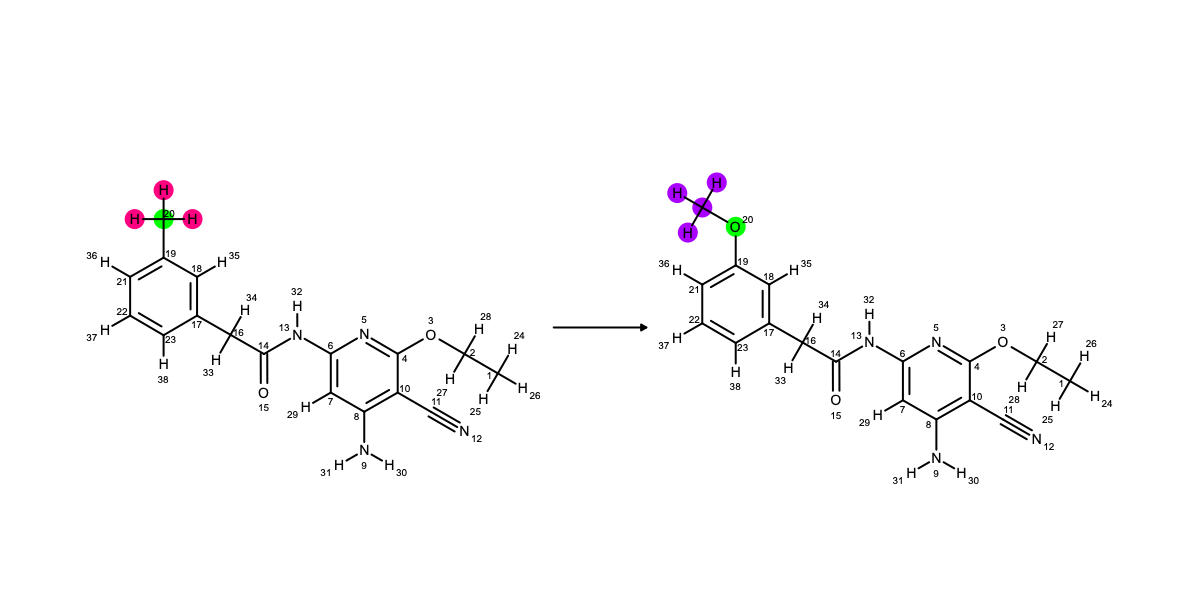

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:37][c:21]1[c:20]([c:18]([c:17]([c:24]([c:22]1[Br:23])[H:38])[C:16]([H:34])([H:35])[C:14](=[O:15])[N:13]([H:33])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:28])([H:29])[C:1]([H:25])([H:26])[H:27])[C:11]#[N:12])[N:9]([H:31])[H:32])[H:30])[Br:19])[H:36] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 23, 18: 21, 19: 22, 20: 20, 21: 19, 22: 17, 23: 24, 24: 25, 25: 26, 26: 28, 27: 27, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 37, 38: 36, 39: 35}


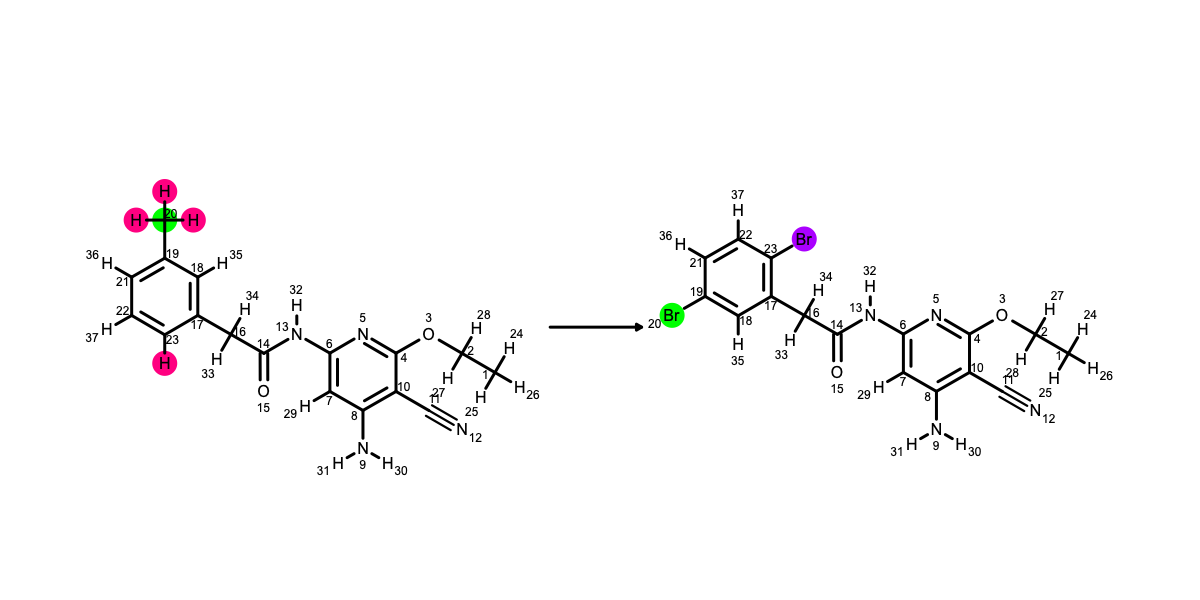

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:37][c:22]1[c:23]([c:17]([c:18]([c:19]([c:21]1[H:36])[Cl:20])[H:35])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:38] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 22, 18: 21, 20: 20, 21: 18, 22: 17, 23: 23, 24: 24, 25: 25, 26: 27, 27: 26, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 37, 38: 35, 40: 34}


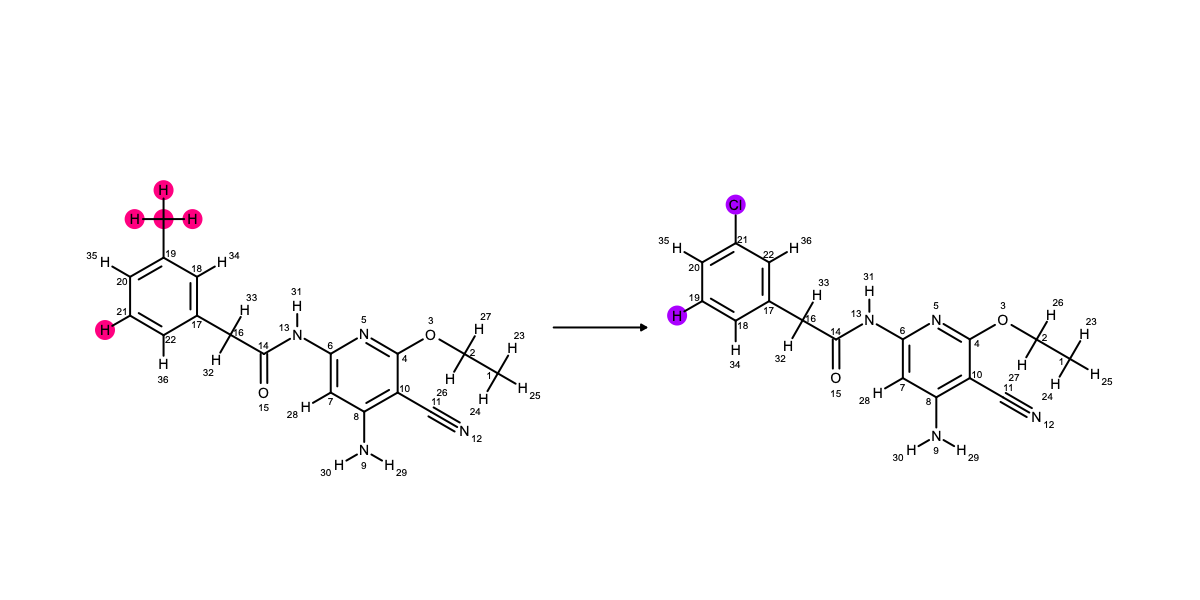

In [19]:
# Examine mappings from reference compound
reference_index = 0 
reference_molecule = molecules[dataset][reference_index]
for target_index, target_molecule in enumerate(molecules[dataset]):
    atom_mapping = atom_mapper.get_best_mapping(reference_molecule, target_molecule)
    display(atom_mapping)

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 27, 27: 26, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40}


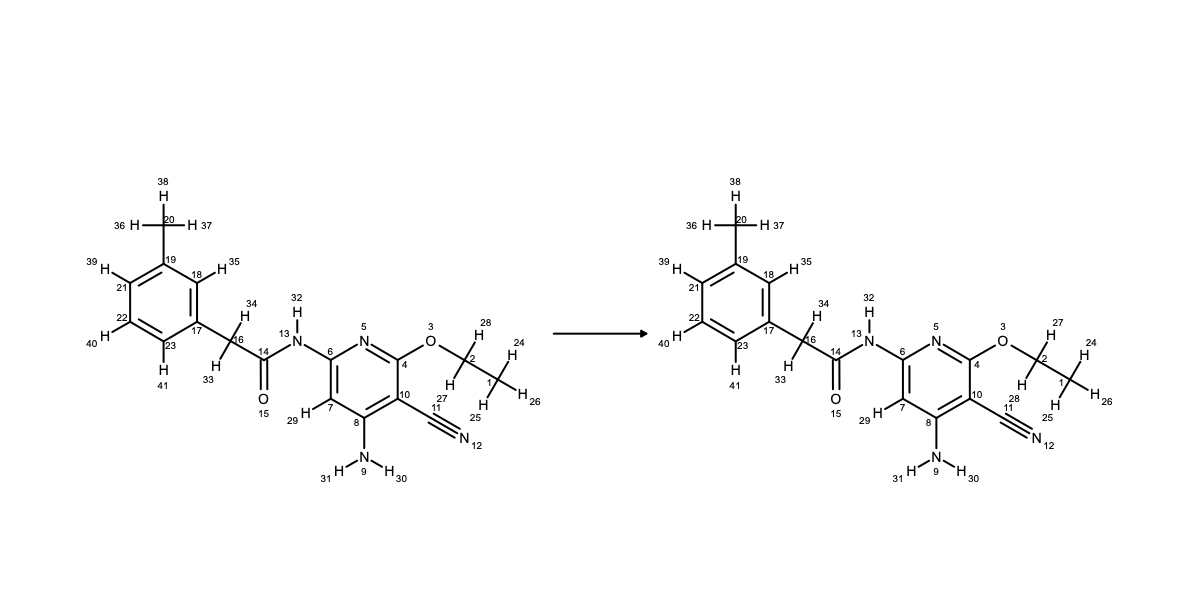

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:42][c:22]1[c:21]([c:18]([c:17]([c:24]([c:23]1[O:25][C:26]([H:44])([H:45])[H:46])[H:43])[C:16]([H:36])([H:37])[C:14](=[O:15])[N:13]([H:35])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:30])([H:31])[C:1]([H:27])([H:28])[H:29])[C:11]#[N:12])[N:9]([H:33])[H:34])[H:32])[O:19][C:20]([H:38])([H:39])[H:40])[H:41] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 23, 18: 22, 19: 24, 20: 21, 21: 20, 22: 17, 23: 28, 24: 27, 25: 26, 26: 30, 27: 29, 28: 31, 29: 32, 30: 33, 31: 34, 32: 35, 33: 36, 34: 42, 38: 41, 39: 40}


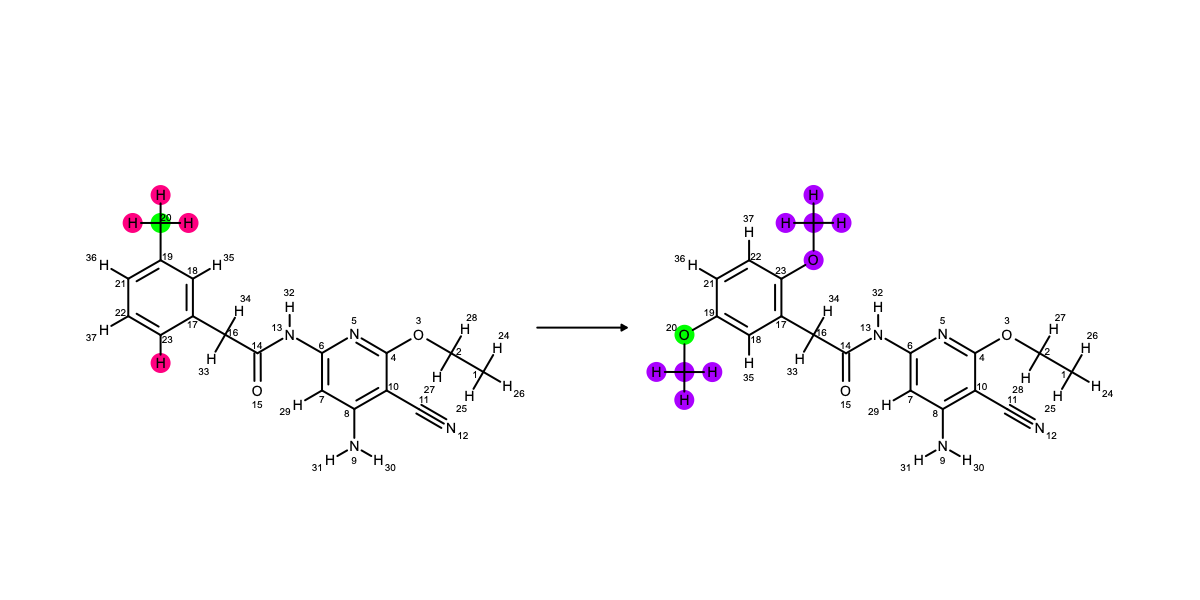

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:39][c:21]1[c:22]([c:23]([c:17]([c:18]([c:20]1[H:38])[C:19]([H:35])([H:36])[H:37])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:41])[H:40] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 22, 18: 21, 20: 20, 21: 19, 22: 17, 23: 23, 24: 24, 25: 25, 26: 27, 27: 26, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 40, 38: 38, 39: 37}


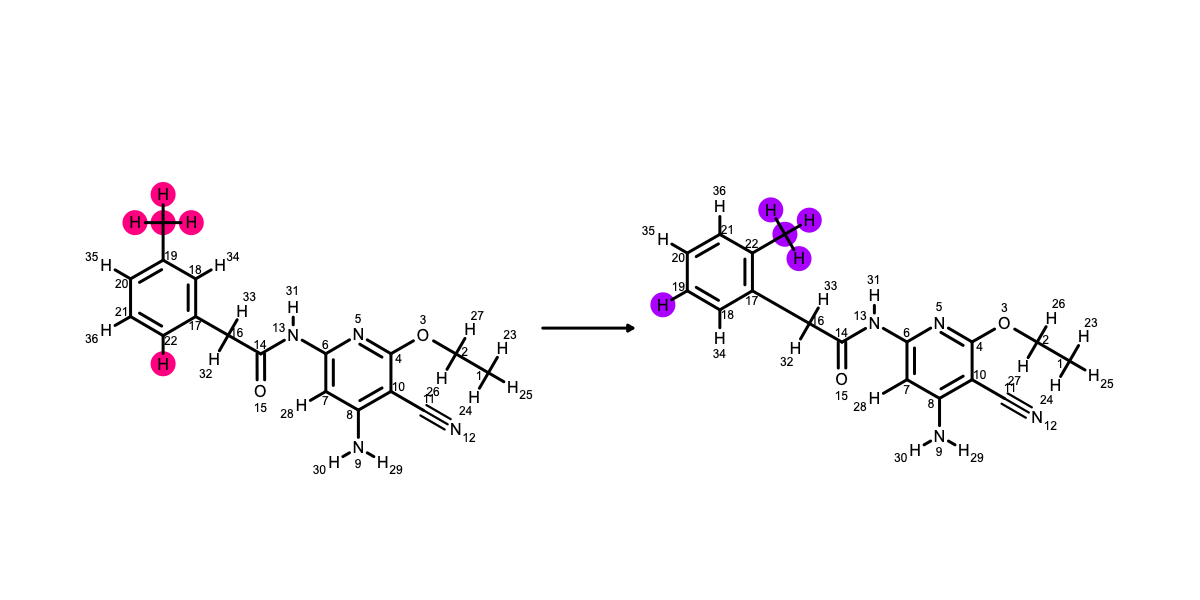

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:48][c:26]1[c:25]([c:22]([c:21]([c:28]([c:27]1[O:29][C:30]([H:50])([H:51])[H:52])[H:49])[C:20]([H:42])([H:43])[C:18](=[O:19])[N:17]([H:41])[c:10]2[c:11]([c:12]([c:14]([c:8]([n:9]2)[O:7][C:6]([H:36])([H:37])[C:5]([H:34])([H:35])[S:2](=[O:3])(=[O:4])[C:1]([H:31])([H:32])[H:33])[C:15]#[N:16])[N:13]([H:39])[H:40])[H:38])[O:23][C:24]([H:44])([H:45])[H:46])[H:47] : mapped atoms {0: 4, 1: 5, 2: 6, 3: 7, 4: 8, 5: 9, 6: 10, 7: 11, 8: 12, 9: 13, 10: 14, 11: 15, 12: 16, 13: 17, 14: 18, 15: 19, 16: 20, 17: 27, 18: 26, 19: 28, 20: 25, 21: 24, 22: 21, 23: 34, 24: 33, 26: 36, 27: 35, 28: 37, 29: 38, 30: 39, 31: 40, 32: 41, 33: 42, 34: 48, 38: 47, 39: 46}


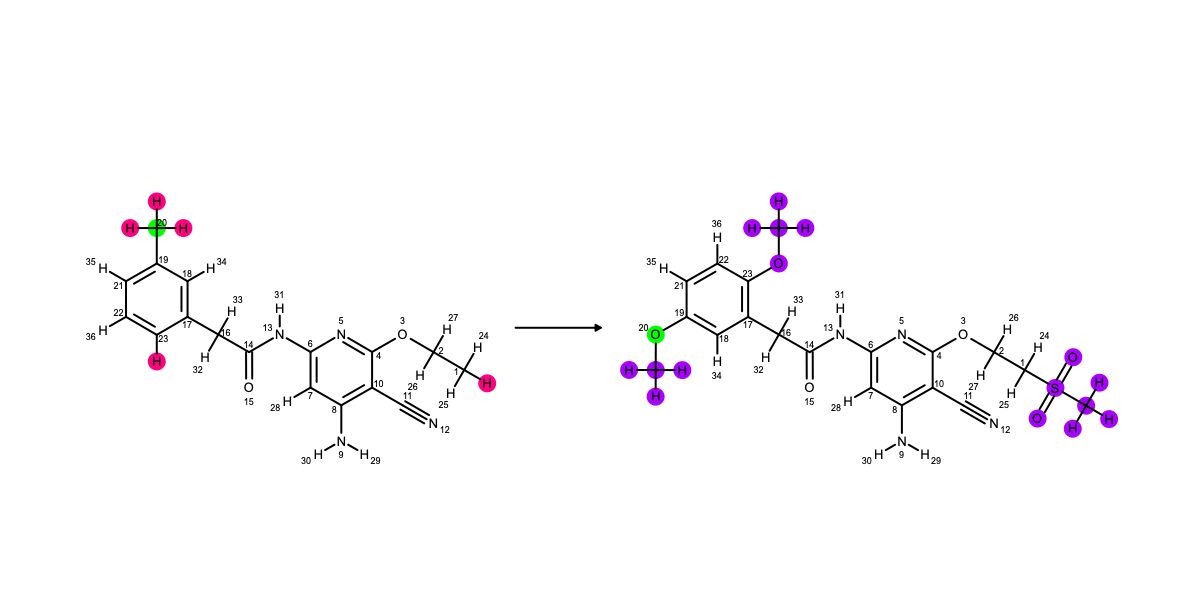

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:36][c:20]1[c:19]([c:18]([c:17]([c:22]([c:21]1[H:37])[H:38])[C:16]([H:32])([H:33])[C:14](=[O:15])[N:13]([H:31])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:26])([H:27])[C:1]([H:23])([H:24])[H:25])[C:11]#[N:12])[N:9]([H:29])[H:30])[H:28])[H:34])[H:35] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 21, 18: 20, 20: 19, 21: 18, 22: 17, 23: 22, 24: 23, 25: 24, 26: 26, 27: 25, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 37, 38: 35, 39: 34, 40: 33}


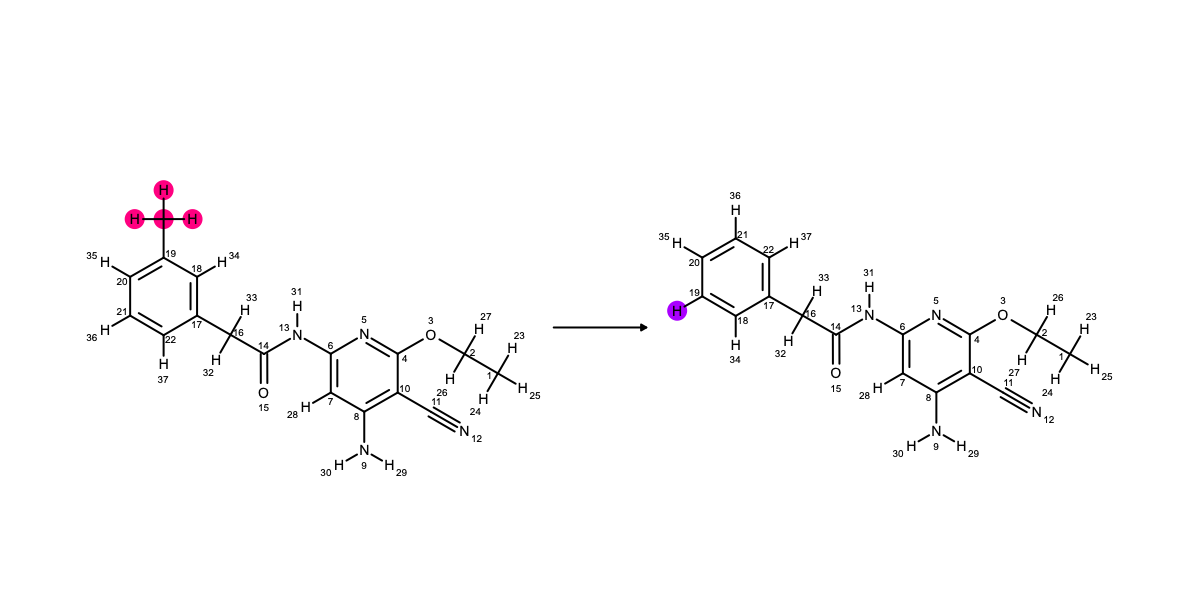

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:36][c:18]1[c:19]([c:20]([c:21]([c:22]([c:17]1[C:16]([H:34])([H:35])[C:14](=[O:15])[N:13]([H:33])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:28])([H:29])[C:1]([H:25])([H:26])[H:27])[C:11]#[N:12])[N:9]([H:31])[H:32])[H:30])[H:39])[H:38])[O:23][C:24]([H:40])([H:41])[H:42])[H:37] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 21, 18: 20, 20: 19, 21: 18, 22: 17, 23: 24, 24: 25, 25: 26, 26: 28, 27: 27, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 38, 39: 36, 40: 35}


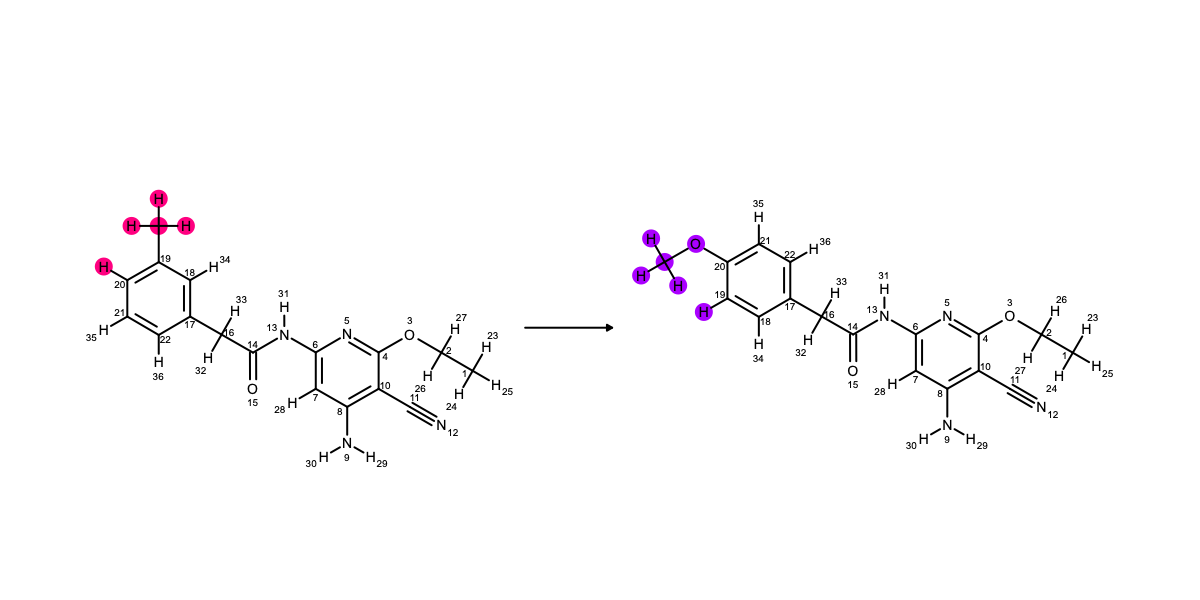

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:40][c:21]1[c:20]([c:18]([c:17]([c:24]([c:22]1[C:23]([H:41])([H:42])[H:43])[H:44])[C:16]([H:34])([H:35])[C:14](=[O:15])[N:13]([H:33])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:28])([H:29])[C:1]([H:25])([H:26])[H:27])[C:11]#[N:12])[N:9]([H:31])[H:32])[H:30])[C:19]([H:36])([H:37])[H:38])[H:39] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 23, 18: 21, 19: 22, 20: 20, 21: 19, 22: 17, 23: 24, 24: 25, 25: 26, 26: 28, 27: 27, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 43, 35: 40, 36: 41, 37: 42, 38: 39, 39: 38}


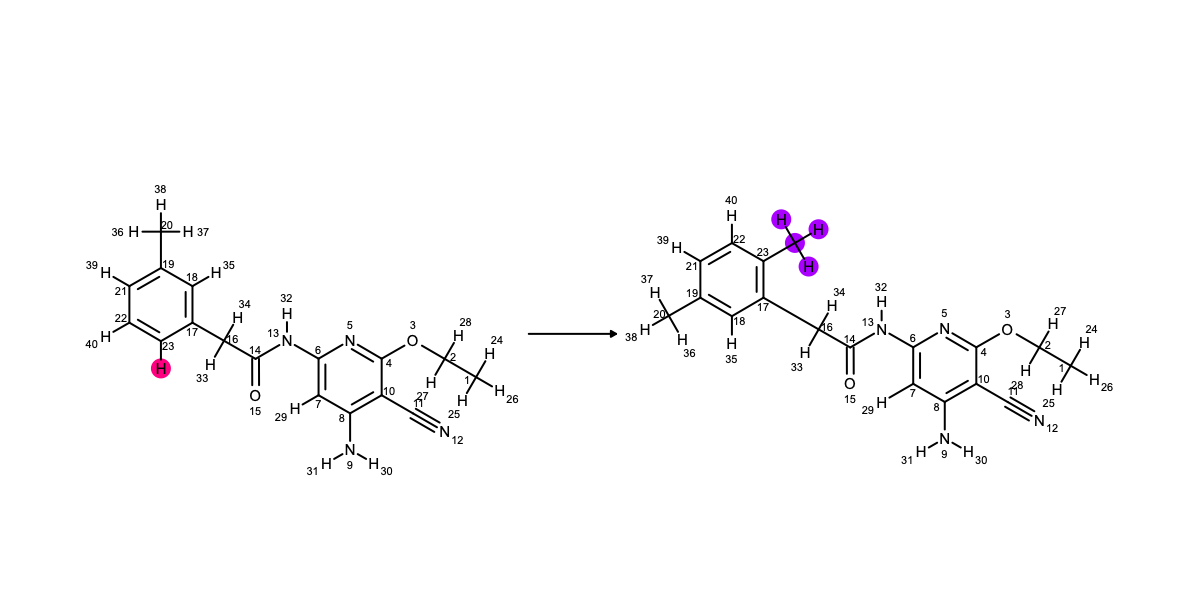

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:43][c:25]1[c:17]([c:18]([c:21]([c:22]([c:24]1[O:26][C:27]([H:44])([H:45])[H:46])[Br:23])[H:42])[O:19][C:20]([H:39])([H:40])[H:41])[C:16]([H:37])([H:38])[C:14](=[O:15])[N:13]([H:36])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:31])([H:32])[C:1]([H:28])([H:29])[H:30])[C:11]#[N:12])[N:9]([H:34])[H:35])[H:33] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 24, 18: 23, 19: 25, 20: 21, 21: 20, 22: 17, 23: 27, 24: 28, 25: 29, 26: 31, 27: 30, 28: 32, 29: 33, 30: 34, 31: 35, 32: 36, 33: 37, 34: 42, 39: 41}


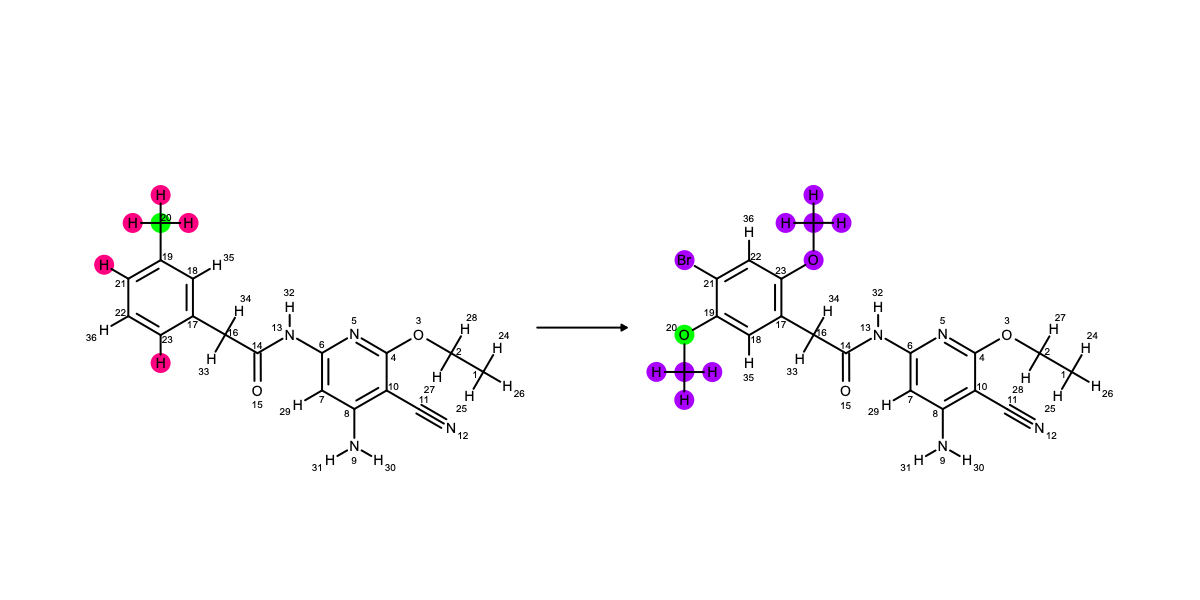

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:37][c:22]1[c:21]([c:20]([c:18]([c:17]([c:23]1[H:38])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[Cl:19])[H:35])[H:36] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 22, 18: 21, 20: 20, 21: 19, 22: 17, 23: 23, 24: 24, 25: 25, 26: 27, 27: 26, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 37, 38: 35, 39: 34}


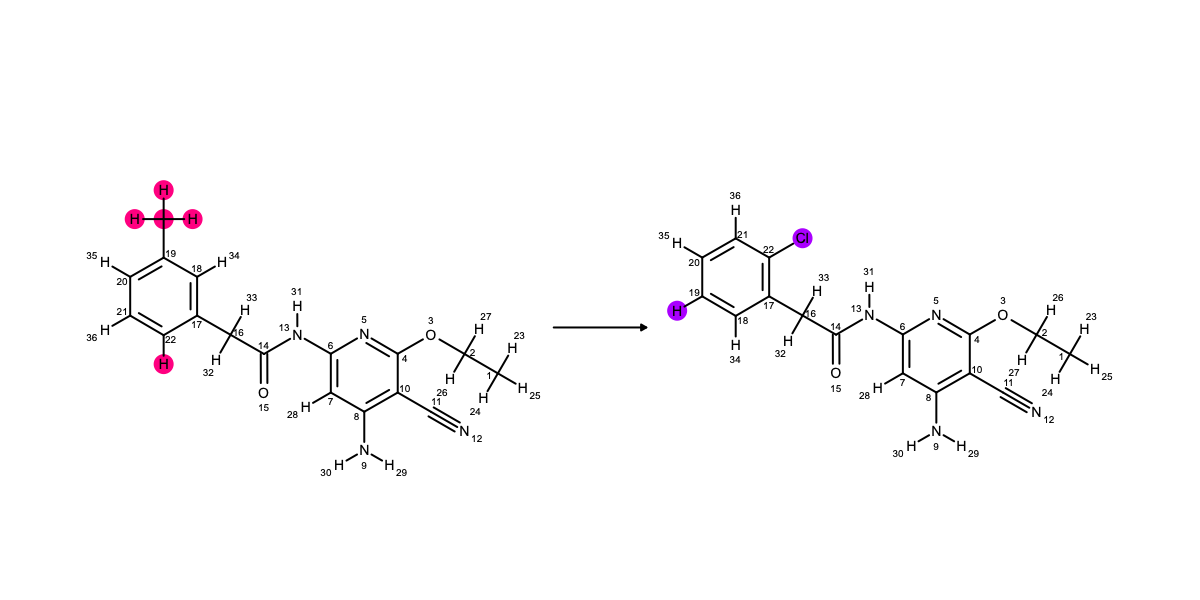

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:46][c:24]1[c:23]([c:20]([c:19]([c:26]([c:25]1[O:27][C:28]([H:48])([H:49])[H:50])[H:47])[C:18]([H:40])([H:41])[C:16](=[O:17])[N:15]([H:39])[c:8]2[c:9]([c:10]([c:12]([c:6]([n:7]2)[O:5][C:4]([H:34])([H:35])[C:3]([H:32])([H:33])[O:2][C:1]([H:29])([H:30])[H:31])[C:13]#[N:14])[N:11]([H:37])[H:38])[H:36])[O:21][C:22]([H:42])([H:43])[H:44])[H:45] : mapped atoms {0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10, 9: 11, 10: 12, 11: 13, 12: 14, 13: 15, 14: 16, 15: 17, 16: 18, 17: 25, 18: 24, 19: 26, 20: 23, 21: 22, 22: 19, 24: 31, 25: 32, 26: 33, 27: 34, 28: 35, 29: 37, 30: 36, 31: 38, 32: 39, 33: 40, 34: 46, 38: 45, 39: 44}


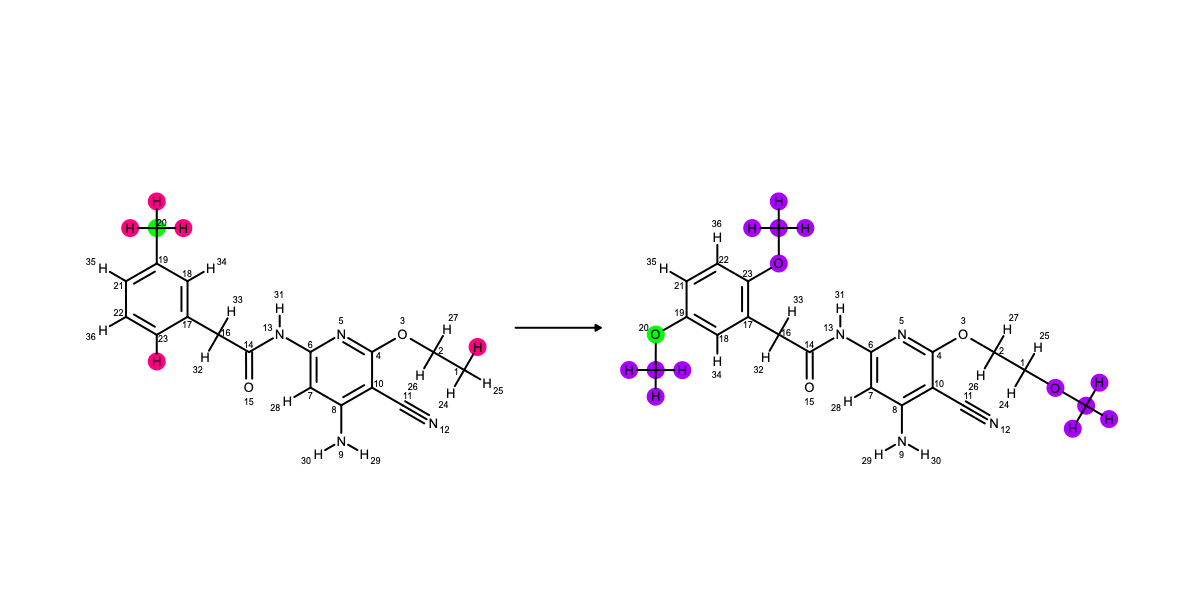

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:46][c:24]1[c:17]([c:18]([c:21]([c:22]([c:23]1[O:25][C:26]([H:47])([H:48])[H:49])[N:27]([H:50])[C:28](=[O:29])[C:30]([H:51])([H:52])[H:53])[H:45])[O:19][C:20]([H:42])([H:43])[H:44])[C:16]([H:40])([H:41])[C:14](=[O:15])[N:13]([H:39])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:34])([H:35])[C:1]([H:31])([H:32])[H:33])[C:11]#[N:12])[N:9]([H:37])[H:38])[H:36] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 23, 18: 22, 19: 24, 20: 21, 21: 20, 22: 17, 23: 32, 24: 31, 25: 30, 26: 34, 27: 33, 28: 35, 29: 36, 30: 37, 31: 38, 32: 39, 33: 40, 34: 45, 39: 44}


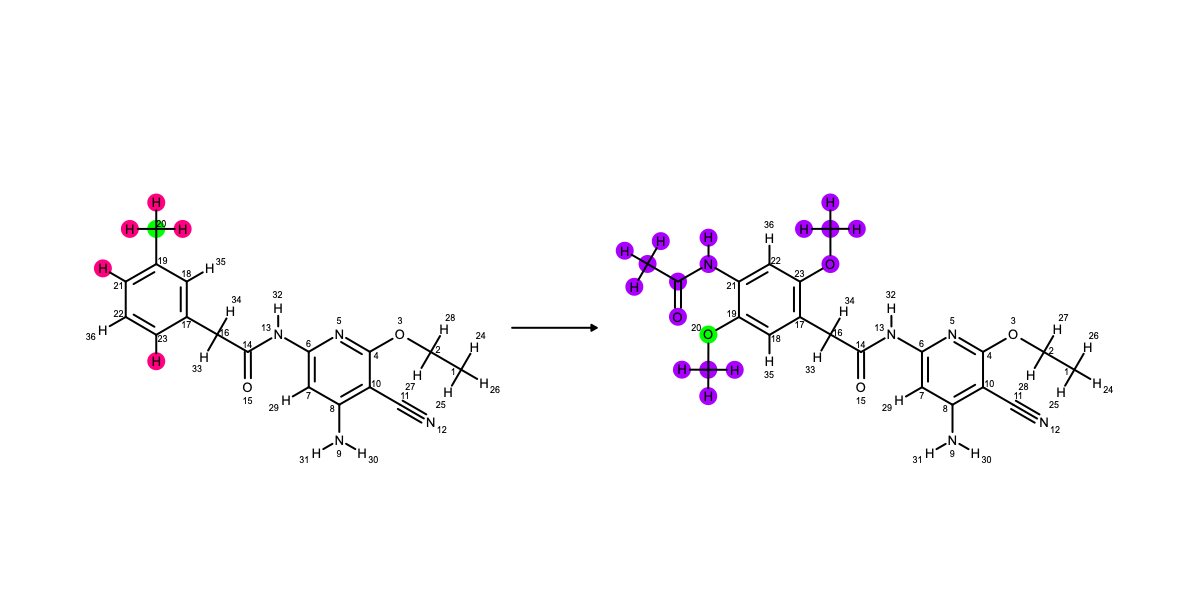

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:49][c:28]1[c:17]([c:18]([c:21]([c:22]([c:27]1[O:29][C:30]([H:50])([H:51])[H:52])[S:23](=[O:24])(=[O:25])[C:26]([H:46])([H:47])[H:48])[H:45])[O:19][C:20]([H:42])([H:43])[H:44])[C:16]([H:40])([H:41])[C:14](=[O:15])[N:13]([H:39])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:34])([H:35])[C:1]([H:31])([H:32])[H:33])[C:11]#[N:12])[N:9]([H:37])[H:38])[H:36] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 27, 18: 26, 19: 28, 20: 21, 21: 20, 22: 17, 23: 32, 24: 31, 25: 30, 26: 34, 27: 33, 28: 35, 29: 36, 30: 37, 31: 38, 32: 39, 33: 40, 34: 48, 39: 44}


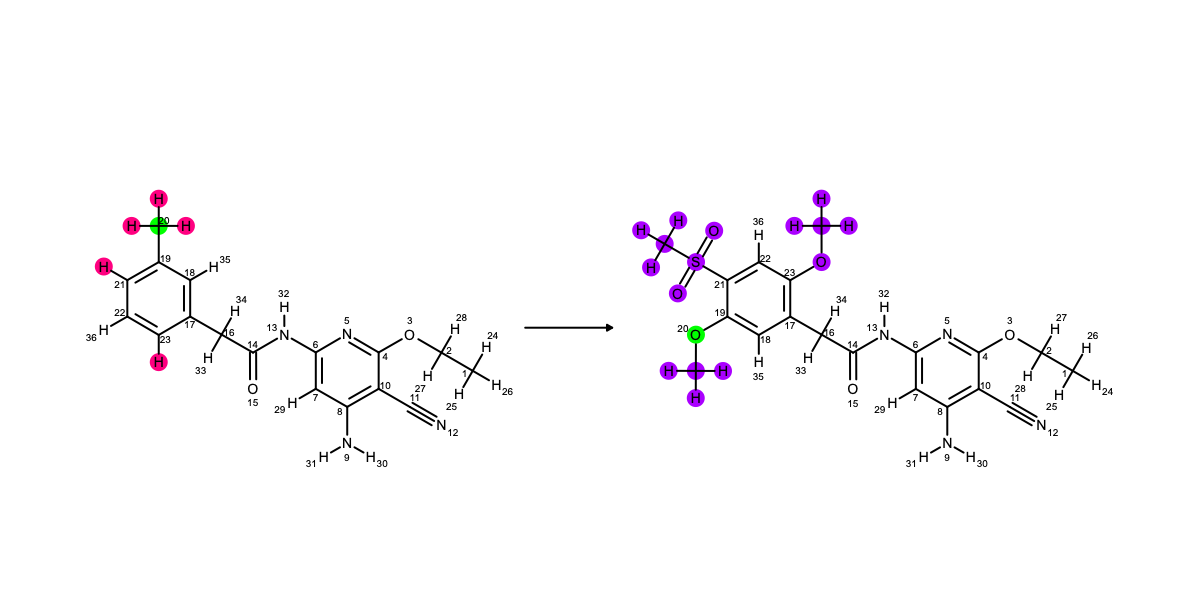

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:52][c:29]1[c:18]([c:19]([c:22]([c:23]([c:28]1[O:30][C:31]([H:53])([H:54])[H:55])[S:24](=[O:25])(=[O:26])[C:27]([H:49])([H:50])[H:51])[H:48])[O:20][C:21]([H:45])([H:46])[H:47])[C:17]([H:43])([H:44])[C:15](=[O:16])[N:14]([H:42])[c:7]2[c:8]([c:9]([c:11]([c:5]([n:6]2)[O:4][C:2]([H:35])([C:1]([H:32])([H:33])[H:34])[C:3]([H:36])([H:37])[H:38])[C:12]#[N:13])[N:10]([H:40])[H:41])[H:39] : mapped atoms {0: 0, 1: 1, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 28, 18: 27, 19: 29, 20: 22, 21: 21, 22: 18, 23: 33, 24: 32, 25: 31, 26: 34, 28: 38, 29: 39, 30: 40, 31: 41, 32: 42, 33: 43, 34: 51, 39: 47}


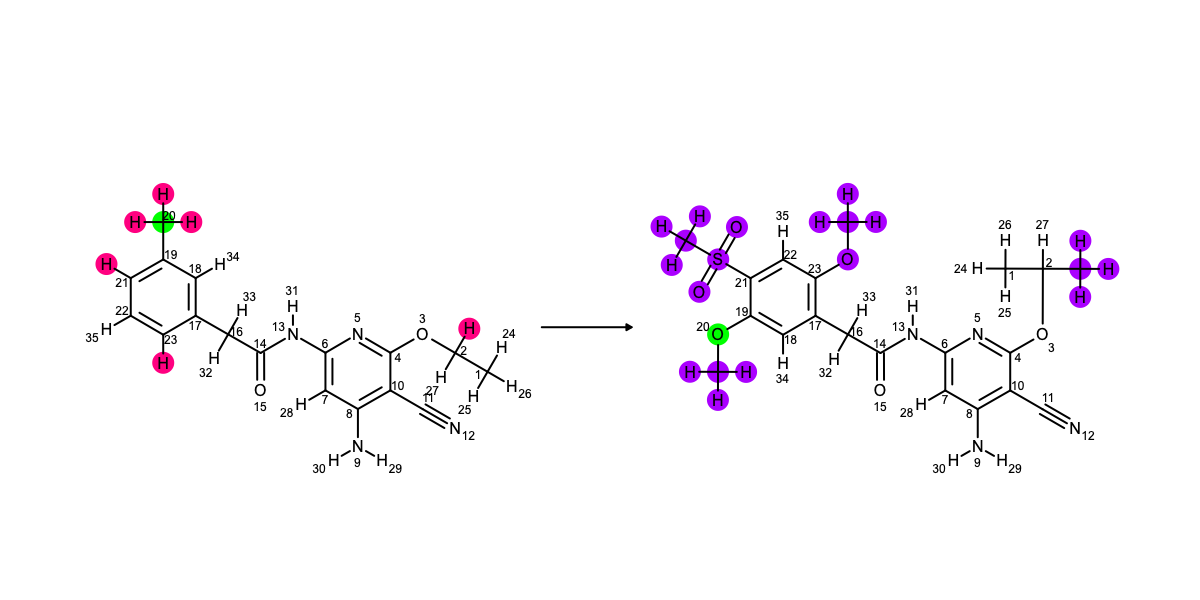

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:35][c:18]1[c:19]([c:20]([c:22]([c:23]([c:17]1[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:38])[H:37])[Cl:21])[H:36] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 22, 18: 21, 20: 19, 21: 18, 22: 17, 23: 23, 24: 24, 25: 25, 26: 27, 27: 26, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 37, 39: 35, 40: 34}


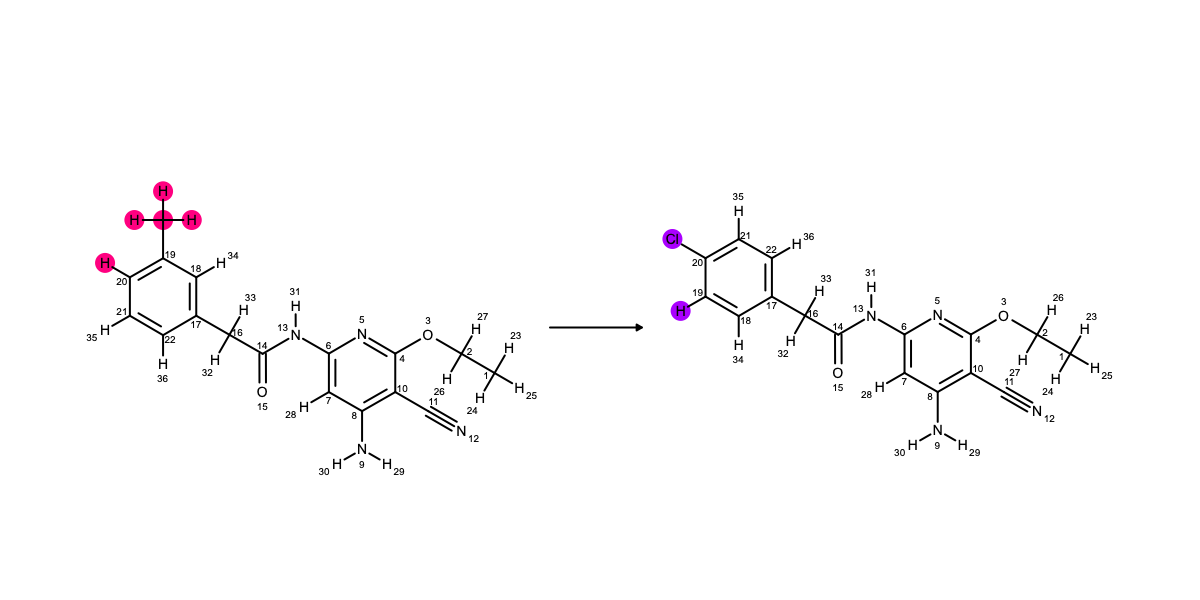

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:43][c:23]1[c:22]([c:19]([c:18]([c:25]([c:24]1[O:26][C:27]([H:45])([H:46])[H:47])[H:44])[C:17]([H:37])([H:38])[C:15](=[O:16])[N:14]([H:36])[c:7]2[c:8]([c:9]([c:11]([c:5]([n:6]2)[O:4][C:3]([H:31])([H:32])[C:2]([H:29])([H:30])[O:1][H:28])[C:12]#[N:13])[N:10]([H:34])[H:35])[H:33])[O:20][C:21]([H:39])([H:40])[H:41])[H:42] : mapped atoms {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 24, 18: 23, 19: 25, 20: 22, 21: 21, 22: 18, 23: 29, 24: 28, 26: 31, 27: 30, 28: 32, 29: 33, 30: 34, 31: 35, 32: 36, 33: 37, 34: 43, 38: 42, 39: 41}


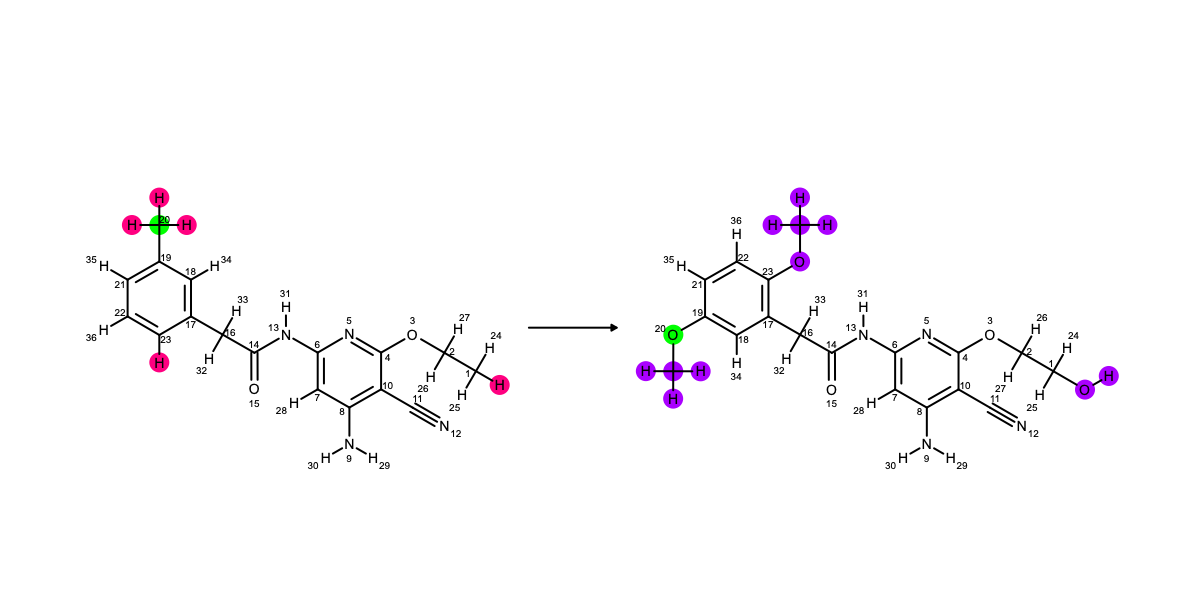

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:36][c:19]1[c:18]([c:17]([c:23]([c:22]([c:20]1[C:21]([H:37])([H:38])[H:39])[H:40])[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 22, 18: 21, 20: 19, 21: 18, 22: 17, 23: 23, 24: 24, 25: 25, 26: 27, 27: 26, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 40, 39: 35, 40: 34}


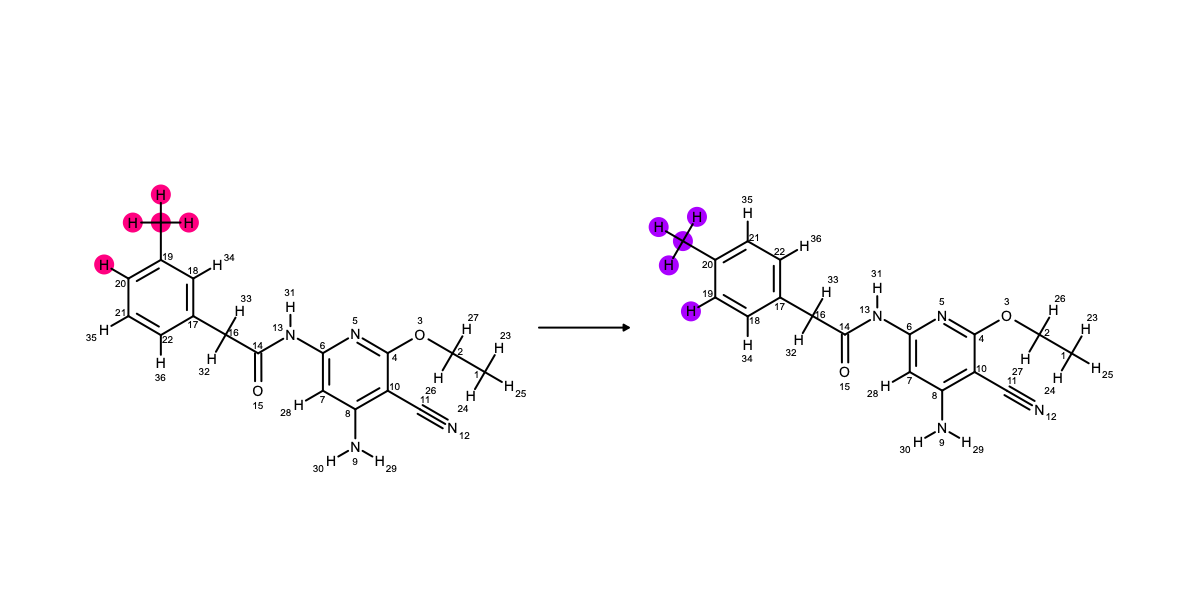

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:45][c:27]1[c:17]([c:18]([c:21]([c:22]([c:26]1[O:28][C:29]([H:46])([H:47])[H:48])[N+:23](=[O:25])[O-:24])[H:44])[O:19][C:20]([H:41])([H:42])[H:43])[C:16]([H:39])([H:40])[C:14](=[O:15])[N:13]([H:38])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:33])([H:34])[C:1]([H:30])([H:31])[H:32])[C:11]#[N:12])[N:9]([H:36])[H:37])[H:35] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 26, 18: 25, 19: 27, 20: 21, 21: 20, 22: 17, 23: 31, 24: 30, 25: 29, 26: 33, 27: 32, 28: 34, 29: 35, 30: 36, 31: 37, 32: 38, 33: 39, 34: 44, 39: 43}


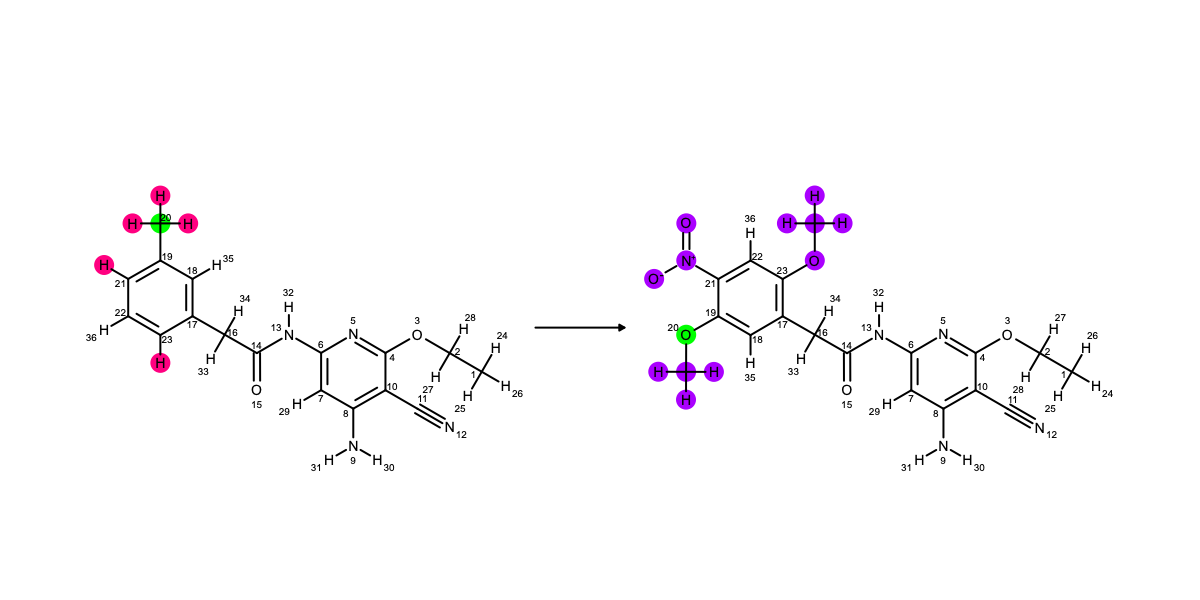

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:41][c:23]1[c:22]([c:21]([c:18]([c:17]([c:24]1[H:42])[C:16]([H:34])([H:35])[C:14](=[O:15])[N:13]([H:33])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:28])([H:29])[C:1]([H:25])([H:26])[H:27])[C:11]#[N:12])[N:9]([H:31])[H:32])[H:30])[O:19][C:20]([H:36])([H:37])[H:38])[H:39])[H:40] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 23, 18: 22, 20: 21, 21: 20, 22: 17, 23: 24, 24: 25, 25: 26, 26: 28, 27: 27, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 41, 38: 39, 39: 38}


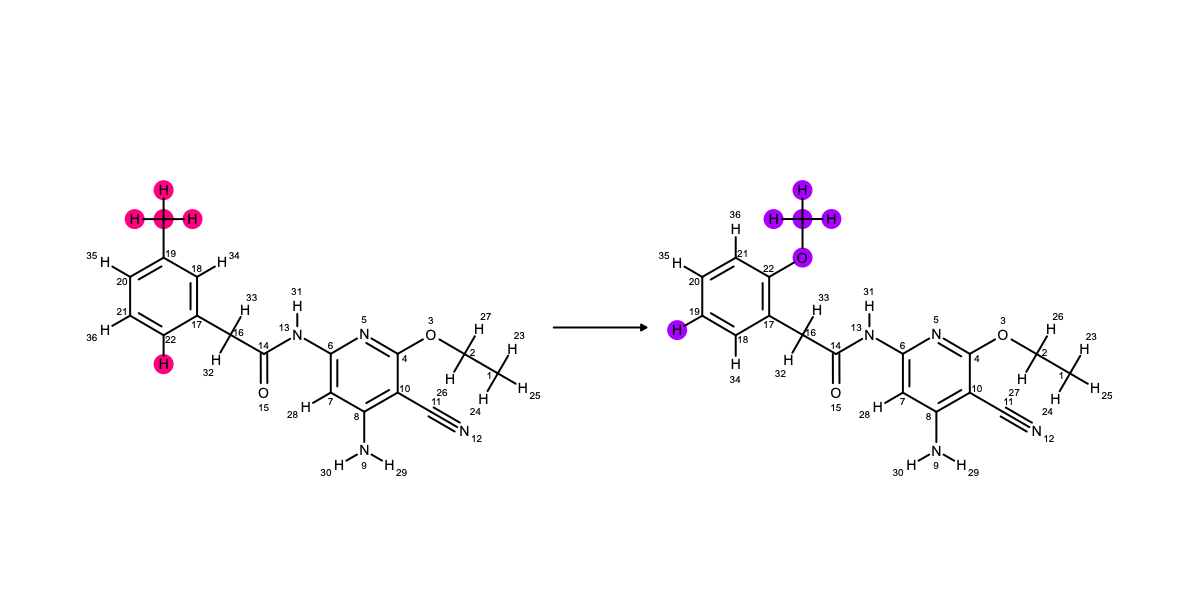

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:41][c:23]1[c:24]([c:17]([c:18]([c:19]([c:22]1[H:40])[O:20][C:21]([H:37])([H:38])[H:39])[H:36])[C:16]([H:34])([H:35])[C:14](=[O:15])[N:13]([H:33])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:28])([H:29])[C:1]([H:25])([H:26])[H:27])[C:11]#[N:12])[N:9]([H:31])[H:32])[H:30])[H:42] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 28, 27: 27, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 38: 39, 39: 40, 40: 41}


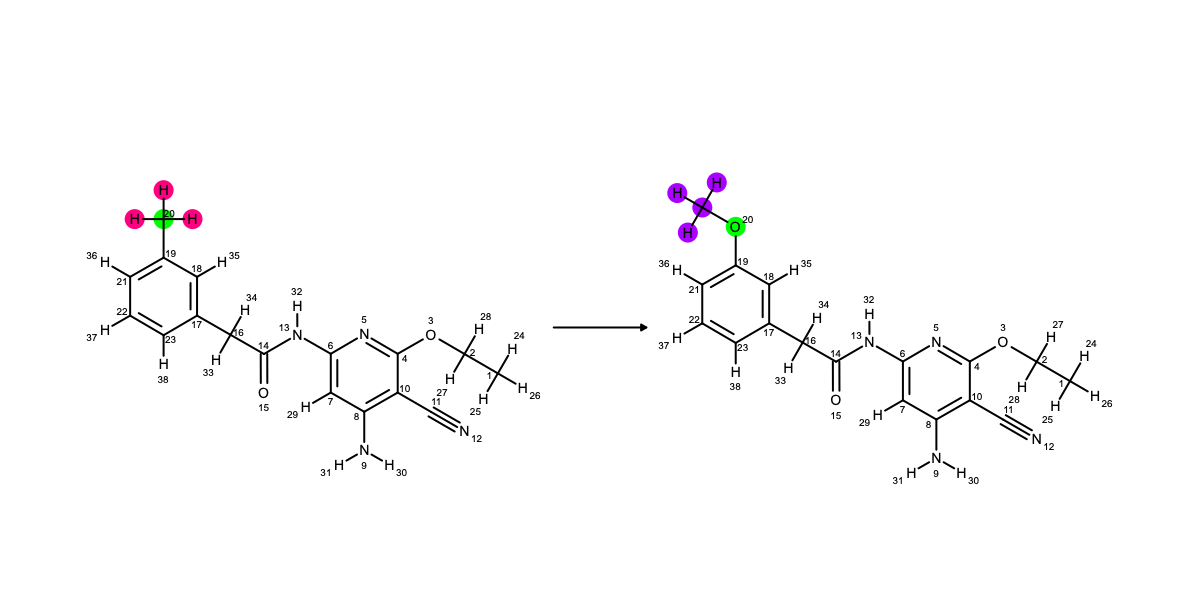

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:37][c:21]1[c:20]([c:18]([c:17]([c:24]([c:22]1[Br:23])[H:38])[C:16]([H:34])([H:35])[C:14](=[O:15])[N:13]([H:33])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:28])([H:29])[C:1]([H:25])([H:26])[H:27])[C:11]#[N:12])[N:9]([H:31])[H:32])[H:30])[Br:19])[H:36] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 23, 18: 21, 19: 22, 20: 20, 21: 19, 22: 17, 23: 24, 24: 25, 25: 26, 26: 28, 27: 27, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 37, 38: 36, 39: 35}


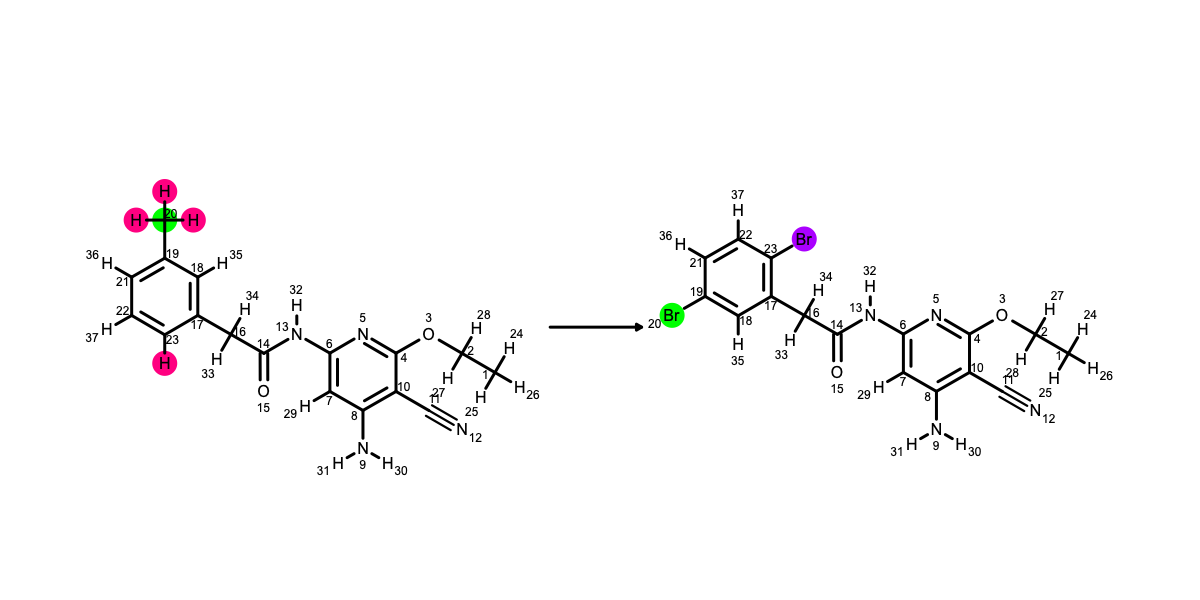

AtomMapping : [H:40][c:22]1[c:21]([c:19]([c:18]([c:17]([c:23]1[H:41])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:35])[C:20]([H:36])([H:37])[H:38])[H:39] -> [H:37][c:22]1[c:23]([c:17]([c:18]([c:19]([c:21]1[H:36])[Cl:20])[H:35])[C:16]([H:33])([H:34])[C:14](=[O:15])[N:13]([H:32])[c:6]2[c:7]([c:8]([c:10]([c:4]([n:5]2)[O:3][C:2]([H:27])([H:28])[C:1]([H:24])([H:25])[H:26])[C:11]#[N:12])[N:9]([H:30])[H:31])[H:29])[H:38] : mapped atoms {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 22, 18: 21, 20: 20, 21: 18, 22: 17, 23: 23, 24: 24, 25: 25, 26: 27, 27: 26, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 37, 38: 35, 40: 34}


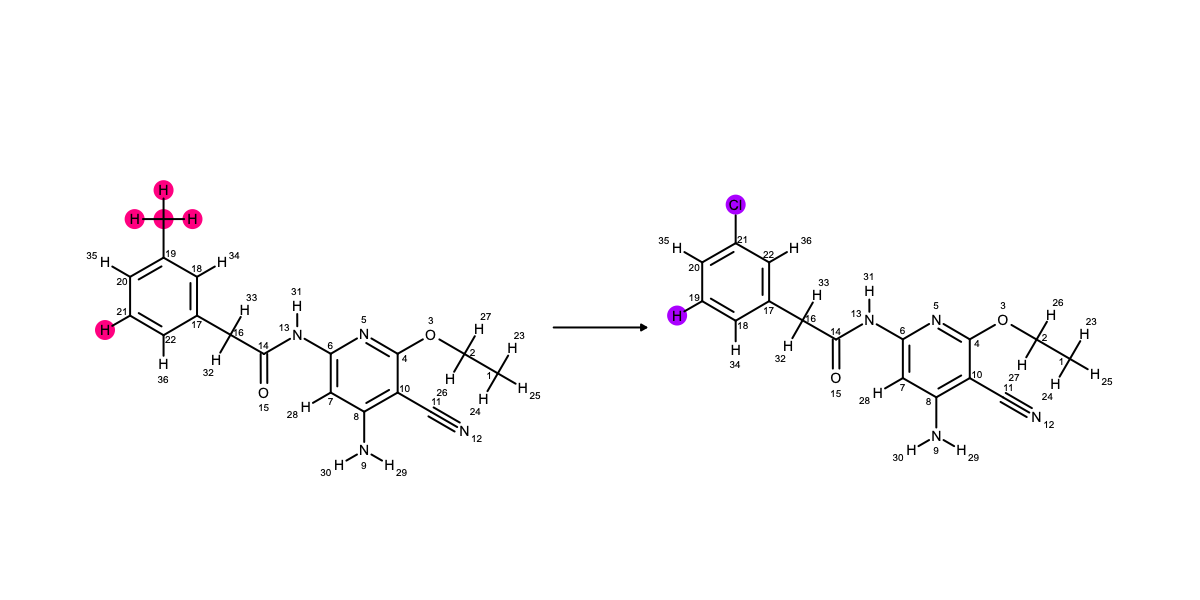

In [20]:
# Now show the mappings generated if we disable the use of coordinates
atom_mapper.use_positions = False

for target_index, target_molecule in enumerate(molecules[dataset]):
    atom_mapping = atom_mapper.get_best_mapping(reference_molecule, target_molecule)
    display(atom_mapping)